In [1]:
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore")

import torch
import numpy as np
from torch_geometric.utils import stochastic_blockmodel_graph, to_dense_adj
from graspologic.embed import AdjacencySpectralEmbed 
from models.RDPG_GD import GRDPG_GD_Armijo
from models.GLASE_unshared_normalized import gLASE 
import matplotlib.pyplot as plt
from torch_geometric.data import Data
import seaborn as sns


# SBM simétrico

## SBM-2 

In [2]:
p = [[0.7, 0.2], [0.2, 0.7]]
n = [500,500]


num_nodes = np.sum(n)
edge_index = stochastic_blockmodel_graph(n, p)

## Calculo valores y vectores propios

A = to_dense_adj(edge_index).squeeze(0)
u, V = torch.linalg.eig(A)

In [3]:
print(f'Dominant Eigenvalues: {u[:2].real}')

Dominant Eigenvalues: tensor([450.2745, 250.7972])


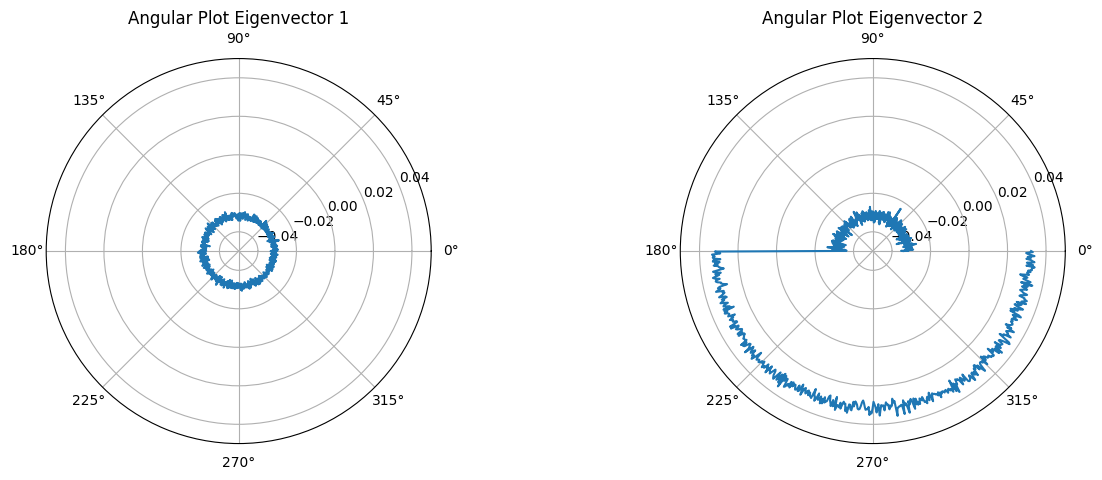

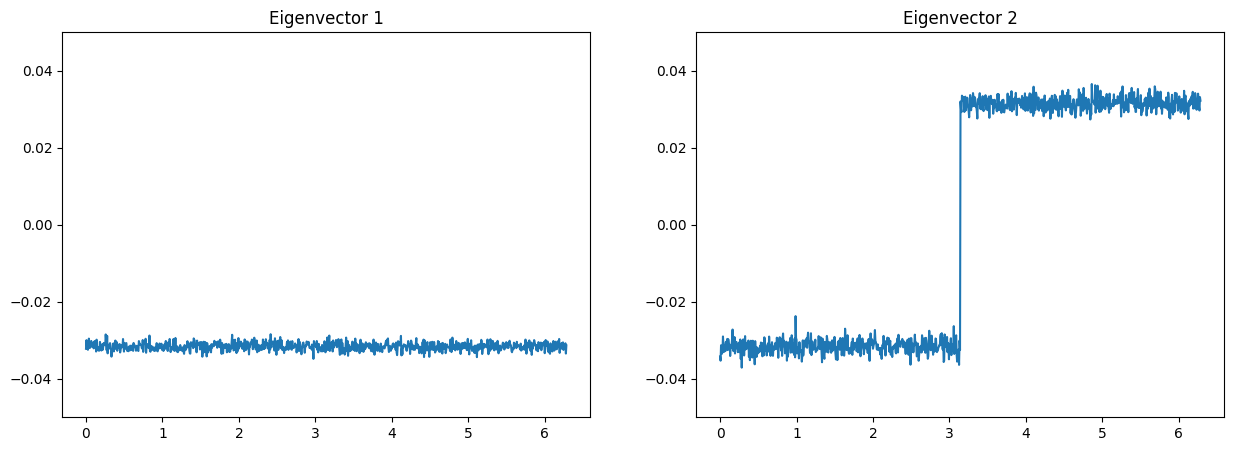

In [4]:
angles = np.linspace(0, 2*np.pi, 1000)

fig, axes = plt.subplots(1, 2, figsize =(15,5))
axes[0] = plt.subplot(1, 2, 1, polar=True)
axes[0].plot(angles, V[:,0].real.numpy())
axes[0].set_title('Angular Plot Eigenvector 1')
axes[0].set_ylim(-0.05, 0.05) 
axes[1] = plt.subplot(1, 2, 2, polar=True)
axes[1].plot(angles, V[:,1].real.numpy())
axes[1].set_title('Angular Plot Eigenvector 2')
axes[1].set_ylim(-0.05, 0.05) 
plt.show()


fig, axes = plt.subplots(1, 2, figsize =(15,5))
axes[0].plot(angles, V[:,0].real.numpy())
axes[0].set_title('Eigenvector 1')
axes[0].set_ylim(-0.05, 0.05) 
axes[1].plot(angles, V[:,1].real.numpy())
axes[1].set_title('Eigenvector 2')
axes[1].set_ylim(-0.05, 0.05) 
plt.show()

## SBM-3 

In [5]:
p1= [[0.5, 0.1, 0.3], [0.1, 0.9, 0.2], [0.3, 0.2, 0.7]]
n1 = [700,500,300]

num_nodes1 = np.sum(n1)
edge_index1 = stochastic_blockmodel_graph(n1, p1)

## Calculo valores y vectores propios

A1 = to_dense_adj(edge_index1).squeeze(0)
u1, V1 = torch.linalg.eig(A1)

In [6]:
p2= [[0.7, 0.1, 0.1], [0.1, 0.7, 0.1], [0.1, 0.1, 0.7]]
n2 = [500,500,500]

num_nodes2 = np.sum(n2)
edge_index2 = stochastic_blockmodel_graph(n2, p2)

## Calculo valores y vectores propios

A2 = to_dense_adj(edge_index2).squeeze(0)
u2, V2 = torch.linalg.eig(A2)

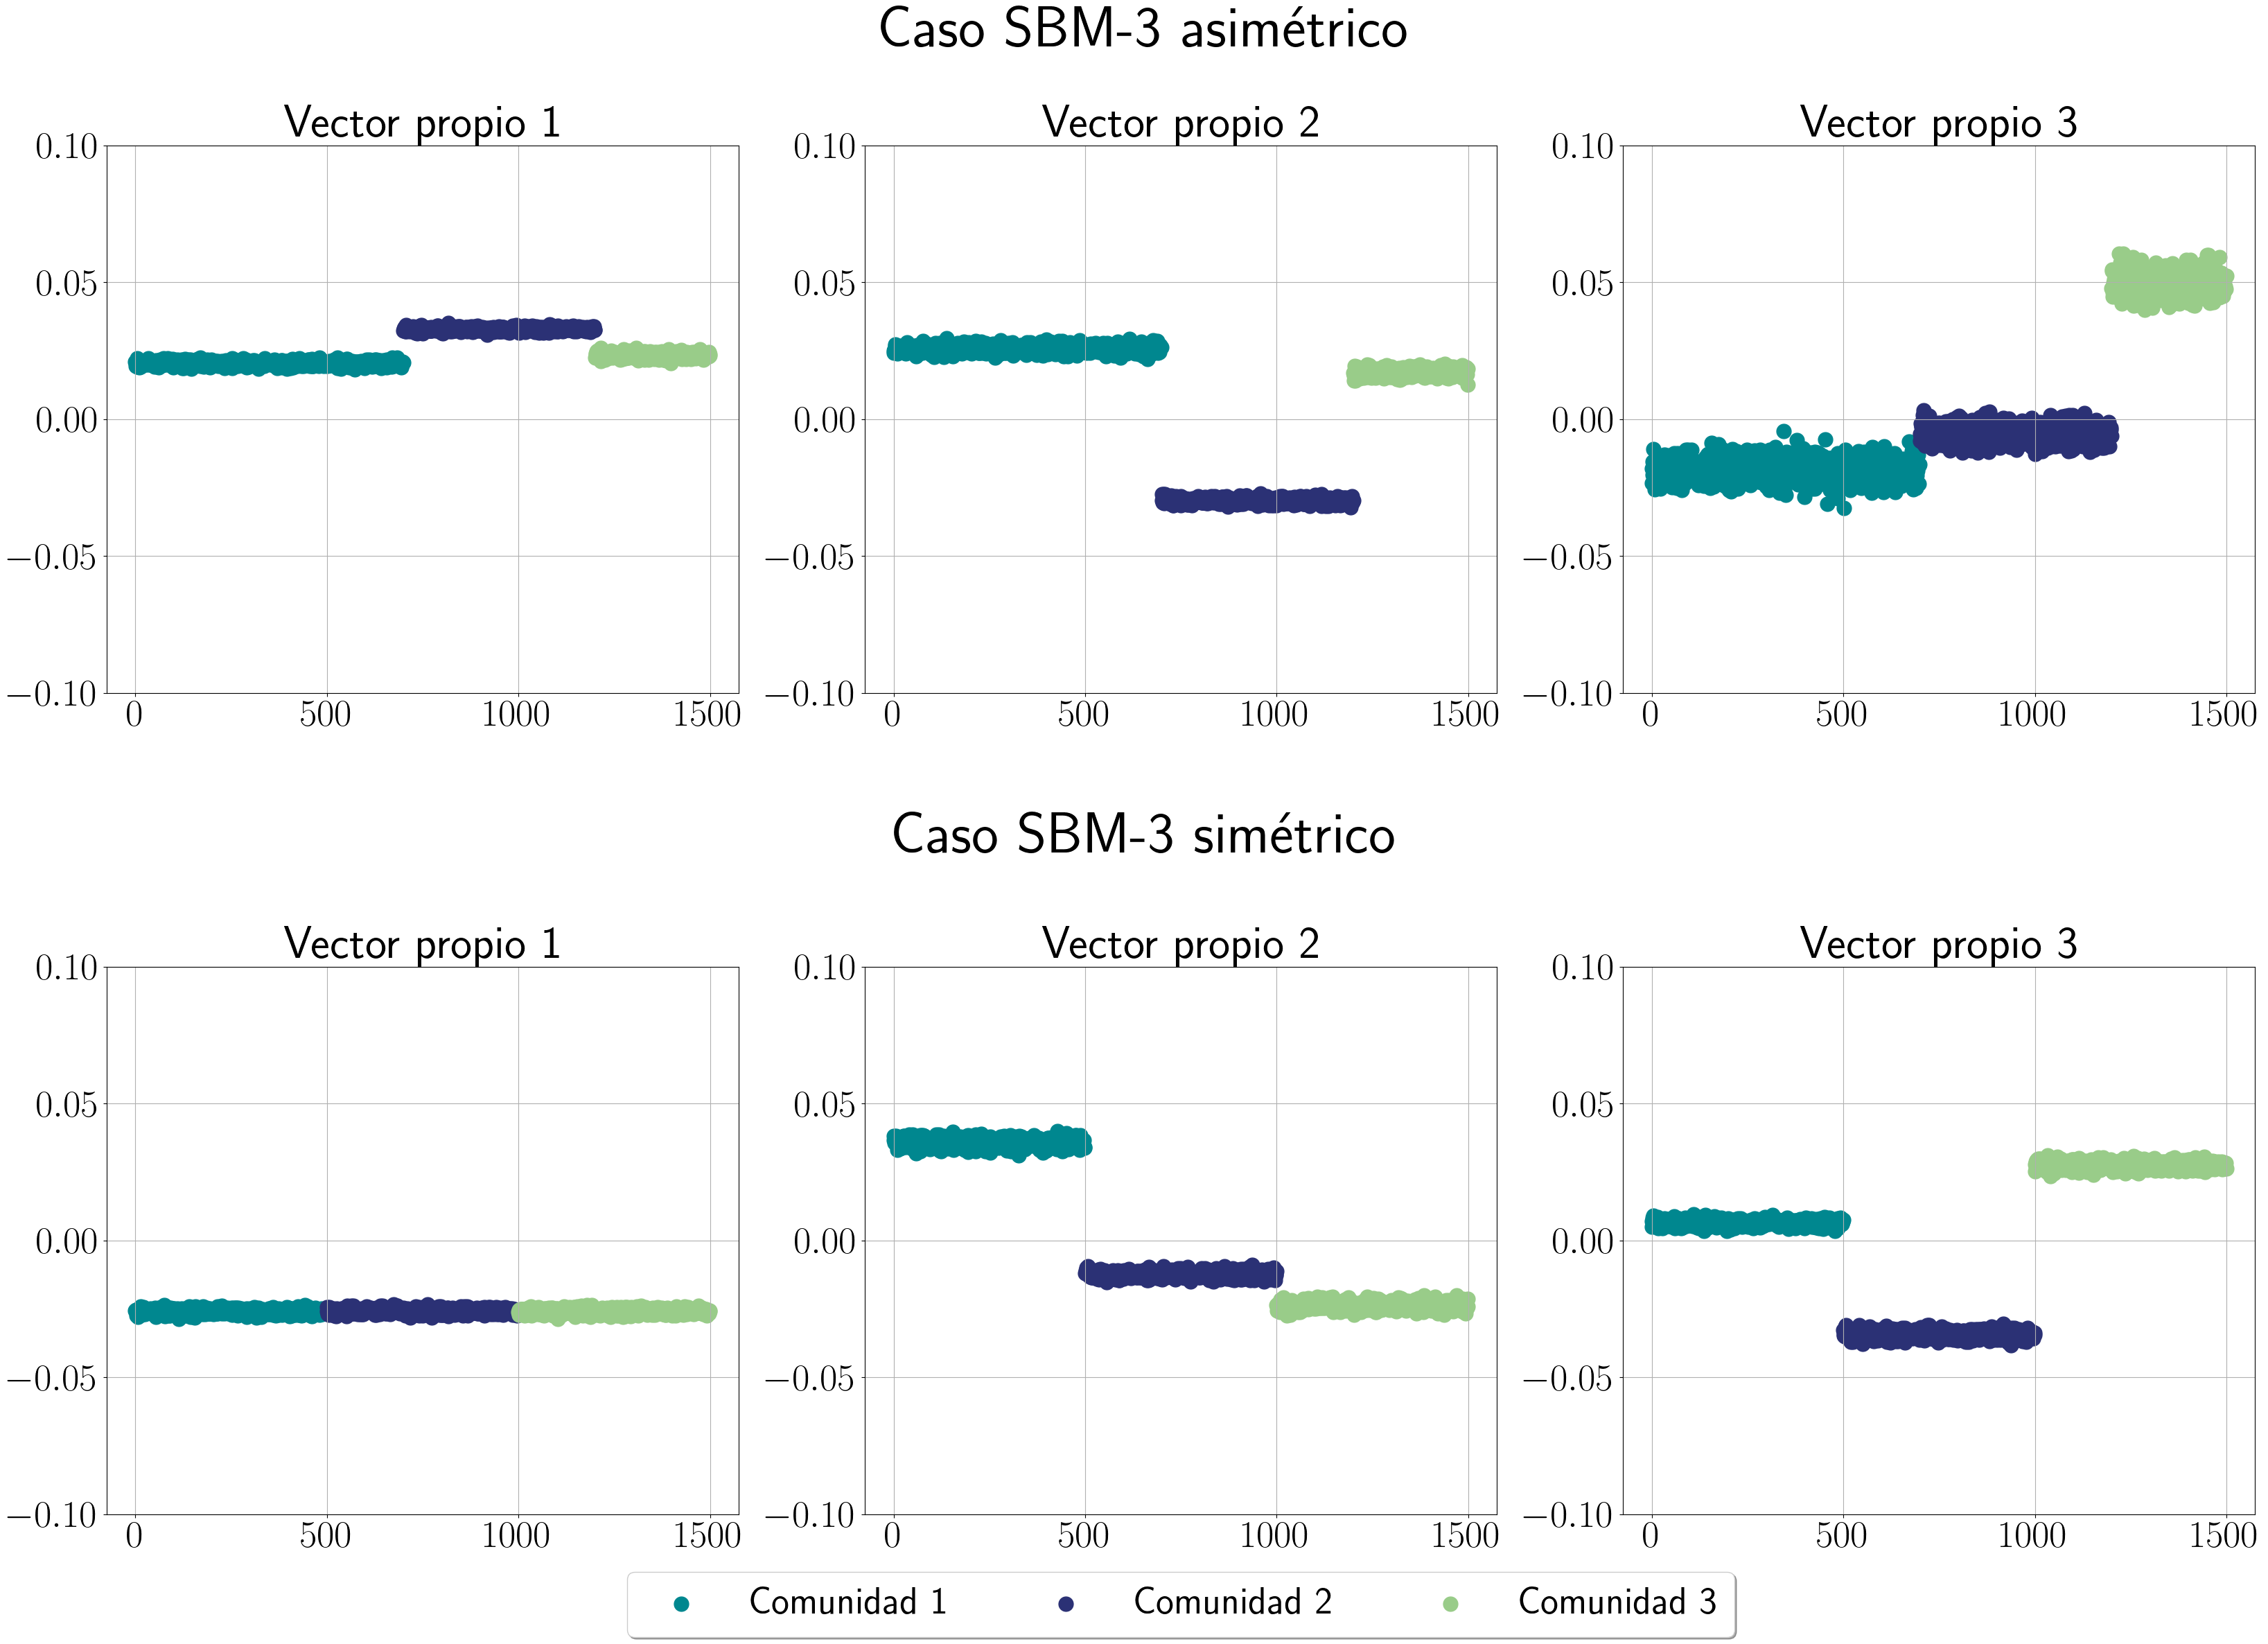

In [7]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 40
plt.rcParams['lines.markersize'] = 15
plt.rcParams['axes.grid'] = True


color_1 = (0.0, 135/255, 143/255)
color_2 = (43/255, 49/255, 117/255)
color_3 = (153/255, 204/255, 137/255)
color_4 = (165/255, 171/255, 248/255)

fig, axes = plt.subplots(2, 3, figsize =(40,25))
fig.suptitle('Caso SBM-3 asimétrico', fontsize=60, fontweight='bold')
plt.subplots_adjust(top=0.9, hspace=0.5)

axes[0,0].scatter(range(700), V1[:700,0].real.numpy(), c=color_1)
axes[0,0].scatter(range(700,1200), V1[700:1200,0].real.numpy(), c=color_2)
axes[0,0].scatter(range(1200,1500), V1[1200:,0].real.numpy(), c=color_3)
axes[0,0].set_ylim(-0.1, 0.1) 
axes[0,0].set_title('Vector propio 1')
axes[0,1].scatter(range(700), V1[:700,1].real.numpy(), c=color_1)
axes[0,1].scatter(range(700,1200), V1[700:1200,1].real.numpy(), c=color_2)
axes[0,1].scatter(range(1200,1500), V1[1200:,1].real.numpy(), c=color_3)
axes[0,1].set_ylim(-0.1, 0.1) 
axes[0,1].set_title('Vector propio 2')
axes[0,2].scatter(range(700), V1[:700,2].real.numpy(), label = 'Comunidad 1', c=color_1)
axes[0,2].scatter(range(700,1200), V1[700:1200,2].real.numpy(), label = 'Comunidad 2', c=color_2)
axes[0,2].scatter(range(1200,1500), V1[1200:,2].real.numpy(), label = 'Comunidad 3', c=color_3)
axes[0,2].set_ylim(-0.1, 0.1) 
axes[0,2].set_title('Vector propio 3')

fig.text(0.5, 0.5, 'Caso SBM-3 simétrico', ha='center', va='center', fontsize=60, fontweight='bold', transform=plt.gcf().transFigure)


axes[1,0].scatter(range(500), V2[:500,0].real.numpy(), c=color_1)
axes[1,0].scatter(range(500,1000), V2[500:1000,0].real.numpy(), c=color_2)
axes[1,0].scatter(range(1000,1500), V2[1000:1500,0].real.numpy(), c=color_3)
axes[1,0].set_ylim(-0.1, 0.1) 
axes[1,0].set_title('Vector propio 1')
axes[1,1].scatter(range(500), V2[:500,1].real.numpy(), c=color_1)
axes[1,1].scatter(range(500,1000), V2[500:1000,1].real.numpy(), c=color_2)
axes[1,1].scatter(range(1000,1500), V2[1000:1500,1].real.numpy(), c=color_3)
axes[1,1].set_ylim(-0.1, 0.1) 
axes[1,1].set_title('Vector propio 2')
axes[1,2].scatter(range(500), V2[:500,2].real.numpy(), label = 'Comunidad 1', c=color_1)
axes[1,2].scatter(range(500,1000), V2[500:1000,2].real.numpy(), label = 'Comunidad 2', c=color_2)
axes[1,2].scatter(range(1000,1500), V2[1000:1500,2].real.numpy(), label = 'Comunidad 3', c=color_3)
axes[1,2].set_ylim(-0.1, 0.1) 
axes[1,2].set_title('Vector propio 3')
axes[1,2].legend(loc='upper center', bbox_to_anchor=(-0.7, -0.07),fancybox=True, shadow=True, ncol=4)

plt.show()

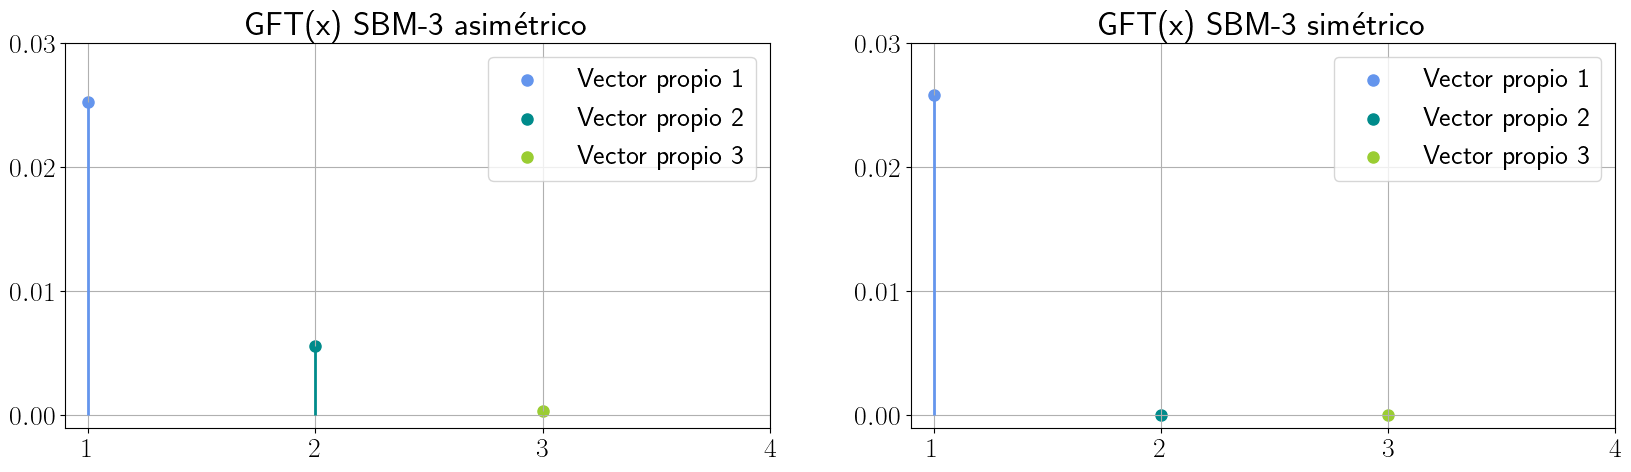

In [8]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.grid'] = True



fig, axes = plt.subplots(1, 2, figsize =(20,5))
axes[0].scatter(1, (V1[:,0].real@torch.ones(num_nodes1)).abs()/num_nodes1, c='cornflowerblue', label='Vector propio 1')
axes[0].stem(1, (V1[:,0].real@torch.ones(num_nodes1)).abs()/num_nodes1, markerfmt=' ', linefmt='cornflowerblue')
axes[0].scatter(2, (V1[:,1].real@torch.ones(num_nodes1)).abs()/num_nodes1, c='darkcyan', label='Vector propio 2')
axes[0].stem(2, (V1[:,1].real@torch.ones(num_nodes1)).abs()/num_nodes1, markerfmt=' ', linefmt='darkcyan')
axes[0].scatter(3, (V1[:,2].real@torch.ones(num_nodes1)).abs()/num_nodes1, c='yellowgreen', label='Vector propio 3')
axes[0].stem(3, (V1[:,2].real@torch.ones(num_nodes1)).abs()/num_nodes1, markerfmt=' ', linefmt='yellowgreen')
axes[0].set_ylim(-0.001, 0.03) 
axes[0].set_xticks(range(1,5))
axes[0].set_title('GFT(x) SBM-3 asimétrico')
axes[0].legend() 
axes[1].scatter(1, (V2[:,0].real@torch.ones(num_nodes2)).abs()/num_nodes2, c='cornflowerblue', label='Vector propio 1')
axes[1].stem(1, (V2[:,0].real@torch.ones(num_nodes2)).abs()/num_nodes1, markerfmt=' ', linefmt='cornflowerblue')
axes[1].scatter(2, (V2[:,1].real@torch.ones(num_nodes2)).abs()/num_nodes2, c='darkcyan', label='Vector propio 2')
axes[1].stem(2, (V2[:,1].real@torch.ones(num_nodes2)).abs()/num_nodes1, markerfmt=' ', linefmt='darkcyan')
axes[1].scatter(3, (V2[:,2].real@torch.ones(num_nodes2)).abs()/num_nodes2, c='yellowgreen', label='Vector propio 3')
axes[1].stem(3, (V2[:,2].real@torch.ones(num_nodes2)).abs()/num_nodes1, markerfmt=' ', linefmt='yellowgreen')
axes[1].set_ylim(-0.001, 0.03) 
axes[1].set_xticks(range(1,5))
axes[1].set_title('GFT(x) SBM-3 simétrico') 
axes[1].legend()

plt.show()

# SENADORES Y LEYES

## CASO simétrico

In [9]:
torch.manual_seed(42)

d = 4

n_P1 = 100 # NUMERO DE SENADORES P1
n_P2 = 100 # NUMERO DE SENADORES P2
n_L1 = 200 # NUMERO DE LEYES P1
n_L2 = 200 # NUMERO DE LEYES P2
n_L3 = 60 # NUMERO DE LEYES NEUTRAS

P1_L1 = 0.8 ## Votos de senadores del partido 1 a leyes grupo 1
P1_L2 = 0.01 ## Votos de senadores del partido 1 a leyes grupo 2
P1_L3 = 0.2 ## Votos de senadores del partido 1 a leyes grupo 3
P2_L1 = 0.01 ## Votos de senadores del partido 2 a leyes grupo 1
P2_L2 = 0.8 ## Votos de senadores del partido 2 a leyes grupo 2
P2_L3 = 0.2 ## Votos de senadores del partido 2 a leyes grupo 3

p = [
    [0, 0, P1_L1, P1_L2, P1_L3],
    [0, 0, P2_L1, P2_L2, P2_L3],
    [P1_L1, P2_L1, 0, 0, 0], 
    [P1_L2, P2_L2, 0, 0, 0], 
    [P1_L3, P2_L3, 0, 0, 0]
    ]

n = [n_P1, n_P2, n_L1, n_L2, n_L3]

num_nodes = np.sum(n)
edge_index = stochastic_blockmodel_graph(n, p)

## Calculo valores y vectores propios

A = to_dense_adj(edge_index).squeeze(0)
u, V = torch.linalg.eig(A)


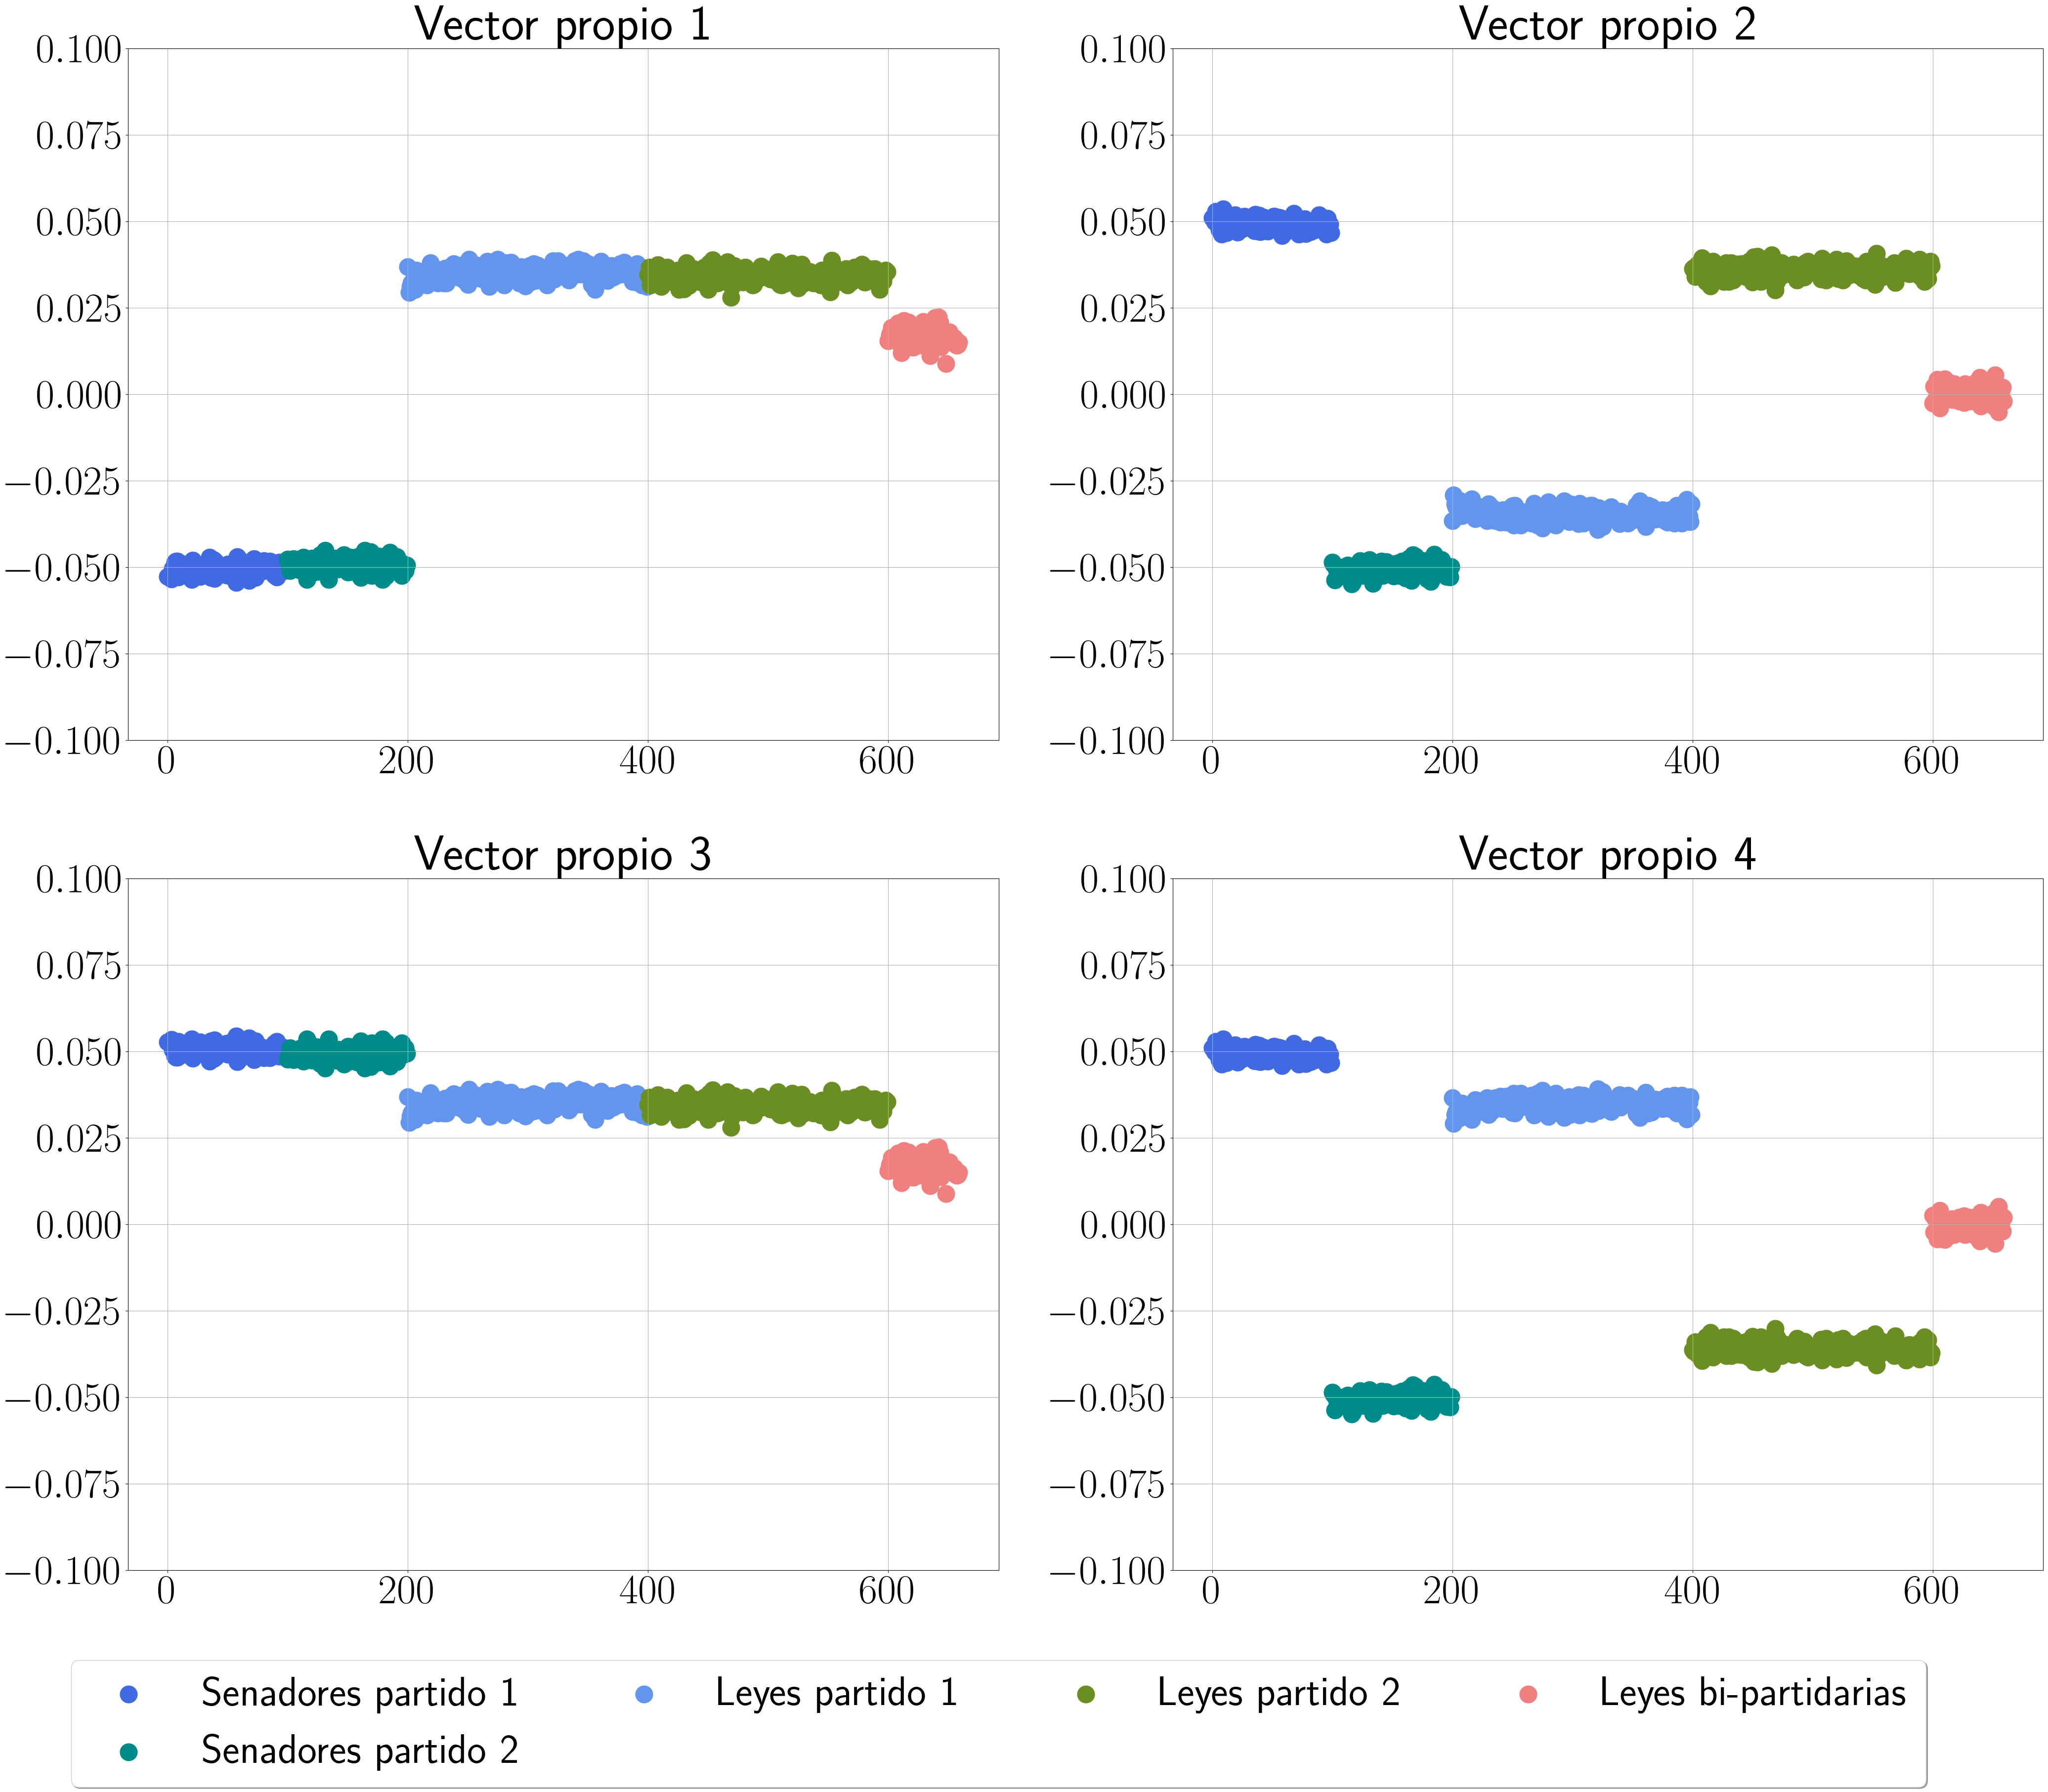

In [10]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 60
plt.rcParams['lines.markersize'] = 25
plt.rcParams['axes.grid'] = True


fig, axes = plt.subplots(2, 2, figsize =(50,40))
axes[0,0].scatter(range(0,100), V[:,0][:100].real.numpy(), label = 'Senadores partido 1', c='royalblue')
axes[0,0].scatter(range(100,200), V[:,0][100:200].real.numpy(), label = 'Senadores partido 2', c='darkcyan')
axes[0,0].scatter(range(200,400), V[:,0][200:400].real.numpy(), label = 'Leyes partido 1', c='cornflowerblue')
axes[0,0].scatter(range(400,600), V[:,0][400:600].real.numpy(), label = 'Leyes partido 2', c='olivedrab')
axes[0,0].scatter(range(600,660), V[:,0][600:].real.numpy(), label = 'Leyes bi-partidarias', c='lightcoral')
axes[0,0].set_title('Vector propio 1')
axes[0,0].set_ylim(-0.1, 0.1) 
axes[0,1].scatter(range(0,100), V[:,1][:100].real.numpy(), label = 'Senadores partido 1', c='royalblue')
axes[0,1].scatter(range(100,200), V[:,1][100:200].real.numpy(), label = 'Senadores partido 2', c='darkcyan')
axes[0,1].scatter(range(200,400), V[:,1][200:400].real.numpy(), label = 'Leyes partido 1', c='cornflowerblue')
axes[0,1].scatter(range(400,600), V[:,1][400:600].real.numpy(), label = 'Leyes partido 2', c='olivedrab')
axes[0,1].scatter(range(600,660), V[:,1][600:].real.numpy(), label = 'Leyes bi-partidarias', c='lightcoral')
axes[0,1].set_title('Vector propio 2')
axes[0,1].set_ylim(-0.1, 0.1) 
axes[1,0].scatter(range(0,100), V[:,2][:100].real.numpy(), label = 'Senadores partido 1', c='royalblue')
axes[1,0].scatter(range(100,200), V[:,2][100:200].real.numpy(), label = 'Senadores partido 2', c='darkcyan')
axes[1,0].scatter(range(200,400), V[:,2][200:400].real.numpy(), label = 'Leyes partido 1', c='cornflowerblue')
axes[1,0].scatter(range(400,600), V[:,2][400:600].real.numpy(), label = 'Leyes partido 2', c='olivedrab')
axes[1,0].scatter(range(600,660), V[:,2][600:].real.numpy(), label = 'Leyes bi-partidarias', c='lightcoral')
axes[1,0].set_title('Vector propio 3')
axes[1,0].set_ylim(-0.1, 0.1)
axes[1,1].scatter(range(0,100), V[:,3][:100].real.numpy(), label = 'Senadores partido 1', c='royalblue')
axes[1,1].scatter(range(100,200), V[:,3][100:200].real.numpy(), label = 'Senadores partido 2', c='darkcyan')
axes[1,1].scatter(range(200,400), V[:,3][200:400].real.numpy(), label = 'Leyes partido 1', c='cornflowerblue')
axes[1,1].scatter(range(400,600), V[:,3][400:600].real.numpy(), label = 'Leyes partido 2', c='olivedrab')
axes[1,1].scatter(range(600,660), V[:,3][600:].real.numpy(), label = 'Leyes bi-partidarias', c='lightcoral')
axes[1,1].set_title('Vector propio 4')
axes[1,1].set_ylim(-0.1, 0.1) 
axes[0,0].legend(loc='upper center', bbox_to_anchor=(1, -1.3),fancybox=True, shadow=True, ncol=4)
plt.show()

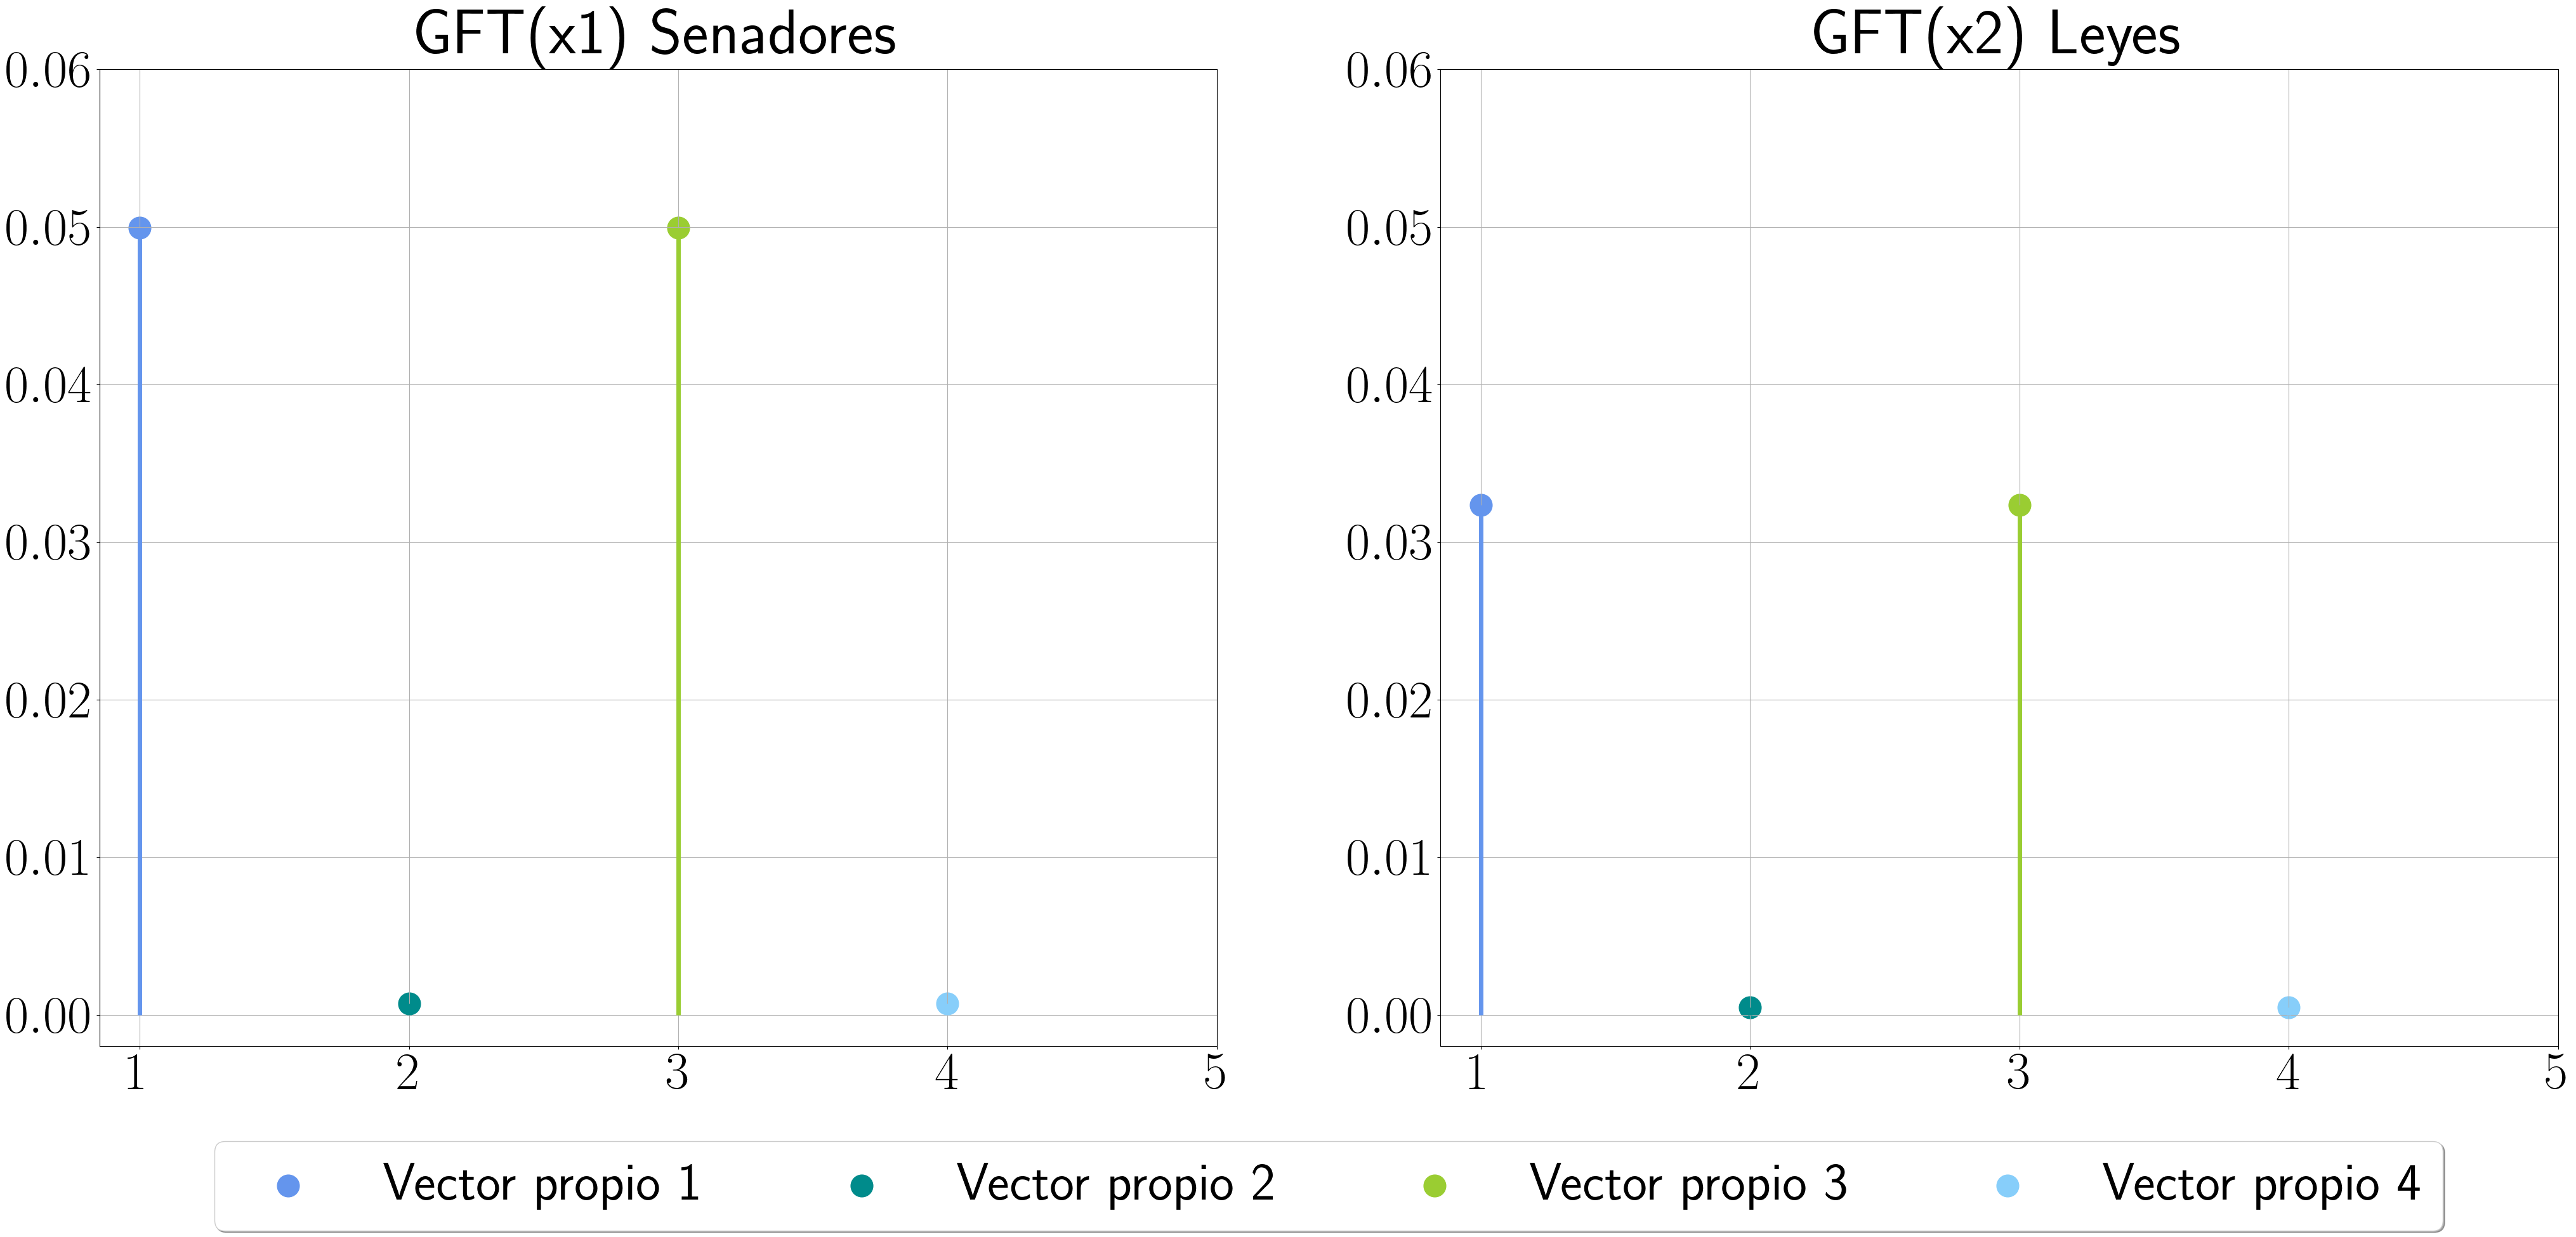

In [11]:
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 60
plt.rcParams['lines.markersize'] = 25
plt.rcParams['axes.grid'] = True
              
fig, axes = plt.subplots(1, 2, figsize =(50,20))
axes[0].scatter(1, (V[:200,0].real@torch.ones(200)).abs()/200, c='cornflowerblue', label='Vector propio 1')
axes[0].stem(1, (V[:200,0].real@torch.ones(200)).abs()/200, markerfmt=' ', linefmt='cornflowerblue')
axes[0].scatter(2, (V[:200,1].real@torch.ones(200)).abs()/200, c='darkcyan', label='Vector propio 2')
axes[0].stem(2, (V[:200,1].real@torch.ones(200)).abs()/200, markerfmt=' ', linefmt='darkcyan')
axes[0].scatter(3, (V[:200,2].real@torch.ones(200)).abs()/200, c='yellowgreen', label='Vector propio 3')
axes[0].stem(3, (V[:200,2].real@torch.ones(200)).abs()/200, markerfmt=' ', linefmt='yellowgreen')
axes[0].scatter(4, (V[:200,3].real@torch.ones(200)).abs()/200, c='lightskyblue', label='Vector propio 4')
axes[0].stem(4, (V[:200,3].real@torch.ones(200)).abs()/200, markerfmt=' ', linefmt='lightskyblue')
axes[0].set_ylim(-0.002, 0.06) 
axes[0].set_xticks(range(1,6))
axes[0].set_title('GFT(x1) Senadores')
# axes[0].legend() 
axes[1].scatter(1, (V[200:,0].real@torch.ones(460)).abs()/460, c='cornflowerblue', label='Vector propio 1')
axes[1].stem(1, (V[200:,0].real@torch.ones(460)).abs()/460, markerfmt=' ', linefmt='cornflowerblue')
axes[1].scatter(2, (V[200:,1].real@torch.ones(460)).abs()/460, c='darkcyan', label='Vector propio 2')
axes[1].stem(2, (V[200:,1].real@torch.ones(460)).abs()/460, markerfmt=' ', linefmt='darkcyan')
axes[1].scatter(3, (V[200:,2].real@torch.ones(460)).abs()/460, c='yellowgreen', label='Vector propio 3')
axes[1].stem(3, (V[200:,2].real@torch.ones(460)).abs()/460, markerfmt=' ', linefmt='yellowgreen')
axes[1].scatter(4, (V[200:,3].real@torch.ones(460)).abs()/460, c='lightskyblue', label='Vector propio 4')
axes[1].stem(4, (V[200:,3].real@torch.ones(460)).abs()/460, markerfmt=' ', linefmt='lightskyblue')
axes[1].set_ylim(-0.002, 0.06) 
axes[1].set_xticks(range(1,6))
axes[1].set_title('GFT(x2) Leyes')
axes[1].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.07),fancybox=True, shadow=True, ncol=4)
# axes[1].legend() 

plt.show()

In [12]:
## Valores propios dominantes (d=4) 
u[:4].real

tensor([-117.0340, -112.0833,  117.0339,  112.0833])

In [13]:
proy_x = (V[:,:4].real.T*torch.ones(num_nodes))

## Senadores
print(proy_x[0,:200].sum())
print(proy_x[1,:200].sum())
print(proy_x[2,:200].sum())
print(proy_x[3,:200].sum())


tensor(-9.9930)
tensor(-0.1400)
tensor(9.9930)
tensor(-0.1400)


In [14]:
## Leyes partidarias
print(proy_x[0,200:600].sum())
print(proy_x[1,200:600].sum())
print(proy_x[2,200:600].sum())
print(proy_x[3,200:600].sum())

tensor(13.8747)
tensor(0.1873)
tensor(13.8747)
tensor(-0.1873)


In [15]:
## Leyes bipartitas
print(proy_x[0,600:].sum())
print(proy_x[1,600:].sum())
print(proy_x[2,600:].sum())
print(proy_x[3,600:].sum())

tensor(1.0024)
tensor(0.0311)
tensor(1.0024)
tensor(-0.0311)


# ONU

In [17]:
from models.onu_fuctions import load_un_dataset, create_un_graphs
import networkx as nx

votes_df = load_un_dataset('../data/UNVotes-1.csv', unknown_votes=True)

## 1960

In [18]:
onu_graph = create_un_graphs(votes_df[votes_df.year==1960])

G = onu_graph.to_undirected()
    
# rename nodes
mapping = {node: i for i, node in enumerate(G.nodes())}
G_ = nx.relabel_nodes(G, mapping)

country_indexes = []
res_indexes = []
__features = []

for node, data in G_.nodes(data=True):
    if data["type"] == "country":
        country_indexes.append(node)
        __features.append(data['country_features'])
    else:
        res_indexes.append(node)
        __features.append(data['res_features'])
        
adj_matrix = nx.to_numpy_array(G_)

A =  torch.Tensor(adj_matrix)
u, V = torch.linalg.eig(A)
u.real[:4]

tensor([ 40.1134, -40.1133,  21.6025, -21.6025])

In [19]:
V[:,2].real[country_indexes].sort().values

tensor([-0.1038, -0.1021, -0.0997, -0.0995, -0.0993, -0.0978, -0.0978, -0.0975,
        -0.0952, -0.0949, -0.0941, -0.0922, -0.0921, -0.0918, -0.0915, -0.0901,
        -0.0898, -0.0856, -0.0843, -0.0840, -0.0835, -0.0822, -0.0816, -0.0795,
        -0.0794, -0.0781, -0.0743, -0.0736, -0.0731, -0.0708, -0.0689, -0.0666,
        -0.0666, -0.0663, -0.0649, -0.0649, -0.0626, -0.0605, -0.0599, -0.0599,
        -0.0580, -0.0541, -0.0436, -0.0333, -0.0258, -0.0239, -0.0237, -0.0230,
        -0.0191, -0.0185, -0.0137, -0.0091, -0.0087, -0.0081, -0.0072, -0.0044,
        -0.0027, -0.0027, -0.0021, -0.0002, -0.0001,  0.0000,  0.0022,  0.0063,
         0.0100,  0.0107,  0.0216,  0.0225,  0.0240,  0.0411,  0.0443,  0.0546,
         0.0628,  0.0640,  0.0662,  0.0686,  0.0710,  0.0742,  0.0746,  0.0791,
         0.0807,  0.0807,  0.0827,  0.0830,  0.0834,  0.0873,  0.0873,  0.0873,
         0.0890,  0.0899,  0.0901,  0.0919,  0.0939,  0.0939,  0.0939,  0.0939,
         0.0939,  0.0939,  0.0939,  0.09

In [21]:
proy_x = (V[:,:4].real.T*torch.ones(adj_matrix.shape[0])) / torch.ones(adj_matrix.shape[0]).norm()

## Paises
print("Proyeccion paises")
print(f'{proy_x[0,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,country_indexes].sum().abs().item():.3f}')

print("")
## Resoluciones
print("Proyeccion resoluciones")
print(f'{proy_x[0,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,res_indexes].sum().abs().item():.3f}')


Proyeccion paises
0.549
0.549
0.089
0.089

Proyeccion resoluciones
0.380
0.380
0.003
0.003


## 1970

In [22]:
onu_graph = create_un_graphs(votes_df[votes_df.year==1970])

G = onu_graph.to_undirected()
    
# rename nodes
mapping = {node: i for i, node in enumerate(G.nodes())}
G_ = nx.relabel_nodes(G, mapping)

country_indexes = []
res_indexes = []
__features = []

for node, data in G_.nodes(data=True):
    if data["type"] == "country":
        country_indexes.append(node)
        __features.append(data['country_features'])
    else:
        res_indexes.append(node)
        __features.append(data['res_features'])
        
adj_matrix = nx.to_numpy_array(G_)

A =  torch.Tensor(adj_matrix)
u, V = torch.linalg.eig(A)
u.real[:4]

tensor([-60.4842,  60.4842,  23.4191, -23.4191])

In [23]:
proy_x = (V[:,:4].real.T*torch.ones(adj_matrix.shape[0])) / torch.ones(adj_matrix.shape[0]).norm()

## Paises
print("Proyeccion paises")
print(f'{proy_x[0,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,country_indexes].sum().abs().item():.3f}')

print("")
## Resoluciones
print("Proyeccion resoluciones")
print(f'{proy_x[0,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,res_indexes].sum().abs().item():.3f}')


Proyeccion paises
0.553
0.553
0.036
0.036

Proyeccion resoluciones
0.398
0.398
0.006
0.006


## 1980

In [25]:
onu_graph = create_un_graphs(votes_df[votes_df.year==1980])

G = onu_graph.to_undirected()
    
# rename nodes
mapping = {node: i for i, node in enumerate(G.nodes())}
G_ = nx.relabel_nodes(G, mapping)

country_indexes = []
res_indexes = []
__features = []

me_indices=[]
nu_indices=[]
di_indices=[]
co_indices=[]
hr_indices=[]
ec_indices=[]


for node, data in G_.nodes(data=True):
    if data["type"] == "country":
        country_indexes.append(node)
        __features.append(data['country_features'])
        if data['country code'] in ['USA', 'JPN', 'RUS' ,'CUB']:
            print(node, data)
    else:
        res_indexes.append(node)
        __features.append(data['res_features'])
        if data['issue code'] == 'me':
            me_indices.append(node)
        if data['issue code'] == 'nu':
            nu_indices.append(node)
        if data['issue code'] == 'di':
            di_indices.append(node)                    
        if data['issue code'] == 'co':
            co_indices.append(node)
        if data['issue code'] == 'hr':
            hr_indices.append(node)
        if data['issue code'] == 'ec':
            ec_indices.append(node)
adj_matrix = nx.to_numpy_array(G_)

A =  torch.Tensor(adj_matrix)
u, V = torch.linalg.eig(A)
u.real[:4]

0 {'country code': 'USA', 'continent': 'North America', 'country_features': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'yellow', 'type': 'country'}
4 {'country code': 'CUB', 'continent': 'North America', 'country_features': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'yellow', 'type': 'country'}
55 {'country code': 'RUS', 'continent': 'Europe', 'country_features': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'royalblue', 'type': 'country'}
132 {'country code': 'JPN', 'continent': 'Asia', 'country_features': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'darkorange', 'type': 'country'}


tensor([-98.7502,  98.7502, -25.2234,  25.2234])

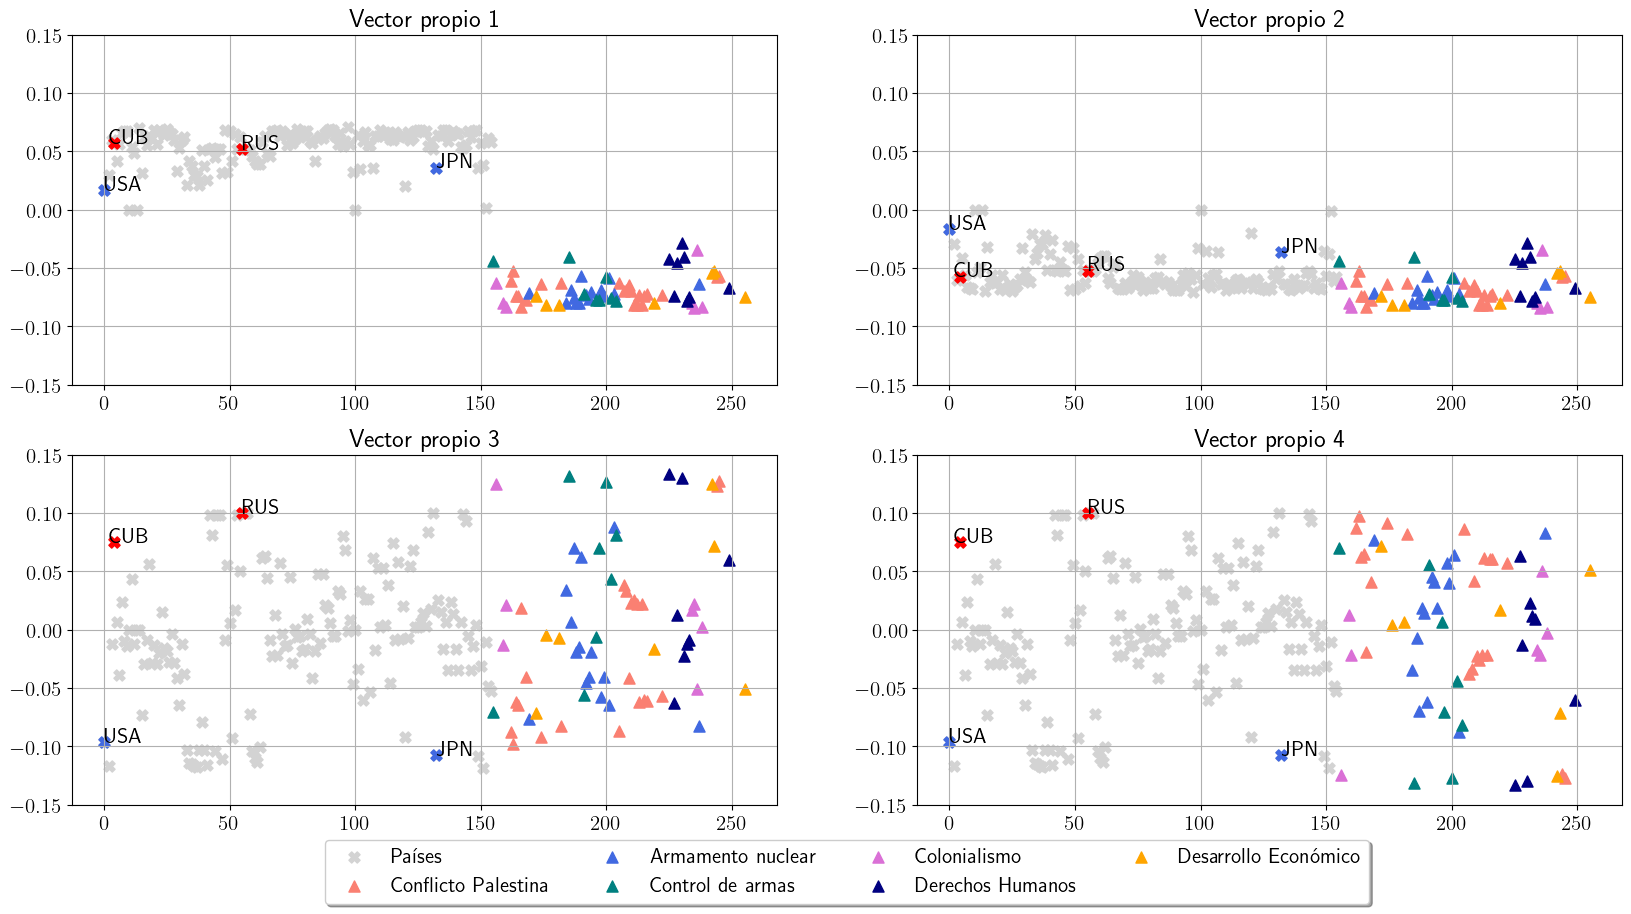

In [26]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.grid'] = True

V0 = V[:,0].real
V1 = V[:,1].real
V2 = V[:,2].real
V3 = V[:,3].real


fig, axes = plt.subplots(2, 2, figsize =(20,10))
axes[0,0].scatter(country_indexes, V0[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[0,0].scatter(me_indices, V0[me_indices], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[0,0].scatter(nu_indices, V0[nu_indices], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[0,0].scatter(di_indices, V0[di_indices], marker='^', label = 'Control de armas', c='teal')
axes[0,0].scatter(co_indices, V0[co_indices], marker='^', label = 'Colonialismo', c='orchid')
axes[0,0].scatter(hr_indices, V0[hr_indices], marker='^', label = 'Derechos Humanos', c='navy')
axes[0,0].scatter(ec_indices, V0[ec_indices], marker='^', label = 'Desarrollo Económico', c='orange')
axes[0,0].scatter(0, V0[0], c='royalblue', marker='X')
axes[0,0].annotate('USA', (0, V0[0]), size=15)
axes[0,0].scatter(132, V0[132], c='royalblue', marker='X')
axes[0,0].annotate('JPN', (132, V0[132]), size=15)
axes[0,0].scatter(4, V0[4], c='red', marker='X')
axes[0,0].annotate('CUB', (2, V0[4]), size=15)
axes[0,0].scatter(55, V0[55], c='red', marker='X')
axes[0,0].annotate('RUS', (55, V0[55]), size=15)
axes[0,0].set_title('Vector propio 1')
axes[0,0].set_ylim(-0.15, 0.15) 

axes[0,1].scatter(country_indexes, V1[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[0,1].scatter(me_indices, V1[me_indices], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[0,1].scatter(nu_indices, V1[nu_indices], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[0,1].scatter(di_indices, V1[di_indices], marker='^', label = 'Control de armas', c='teal')
axes[0,1].scatter(co_indices, V1[co_indices], marker='^', label = 'Colonialismo', c='orchid')
axes[0,1].scatter(hr_indices, V1[hr_indices], marker='^', label = 'Derechos Humanos', c='navy')
axes[0,1].scatter(ec_indices, V1[ec_indices], marker='^', label = 'Desarrollo Económico', c='orange')
axes[0,1].scatter(0, V1[0], c='royalblue', marker='X')
axes[0,1].annotate('USA', (0, V1[0]), size=15)
axes[0,1].scatter(132, V1[132], c='royalblue', marker='X')
axes[0,1].annotate('JPN', (132, V1[132]), size=15)
axes[0,1].scatter(4, V1[4], c='red', marker='X')
axes[0,1].annotate('CUB', (2, V1[4]), size=15)
axes[0,1].scatter(55, V1[55], c='red', marker='X')
axes[0,1].annotate('RUS', (55, V1[55]), size=15)
axes[0,1].set_title('Vector propio 2')
axes[0,1].set_ylim(-0.15, 0.15) 

axes[1,0].scatter(country_indexes, V2[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[1,0].scatter(me_indices, V2[me_indices], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[1,0].scatter(nu_indices, V2[nu_indices], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[1,0].scatter(di_indices, V2[di_indices], marker='^', label = 'Control de armas', c='teal')
axes[1,0].scatter(co_indices, V2[co_indices], marker='^', label = 'Colonialismo', c='orchid')
axes[1,0].scatter(hr_indices, V2[hr_indices], marker='^', label = 'Derechos Humanos', c='navy')
axes[1,0].scatter(ec_indices, V2[ec_indices], marker='^', label = 'Desarrollo Económico', c='orange')
axes[1,0].scatter(0, V2[0], c='royalblue', marker='X')
axes[1,0].annotate('USA', (0, V2[0]), size=15)
axes[1,0].scatter(132, V2[132], c='royalblue', marker='X')
axes[1,0].annotate('JPN', (132, V2[132]), size=15)
axes[1,0].scatter(4, V2[4], c='red', marker='X')
axes[1,0].annotate('CUB', (2, V2[4]), size=15)
axes[1,0].scatter(55, V2[55], c='red', marker='X')
axes[1,0].annotate('RUS', (55, V2[55]), size=15)
axes[1,0].set_title('Vector propio 3')
axes[1,0].set_ylim(-0.15, 0.15) 

axes[1,1].scatter(country_indexes, V3[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[1,1].scatter(me_indices, V3[me_indices], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[1,1].scatter(nu_indices, V3[nu_indices], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[1,1].scatter(di_indices, V3[di_indices], marker='^', label = 'Control de armas', c='teal')
axes[1,1].scatter(co_indices, V3[co_indices], marker='^', label = 'Colonialismo', c='orchid')
axes[1,1].scatter(hr_indices, V3[hr_indices], marker='^', label = 'Derechos Humanos', c='navy')
axes[1,1].scatter(ec_indices, V3[ec_indices], marker='^', label = 'Desarrollo Económico', c='orange')
axes[1,1].scatter(0, V3[0], c='royalblue', marker='X')
axes[1,1].annotate('USA', (0, V3[0]), size=15)
axes[1,1].scatter(132, V3[132], c='royalblue', marker='X')
axes[1,1].annotate('JPN', (132, V3[132]), size=15)
axes[1,1].scatter(4, V3[4], c='red', marker='X')
axes[1,1].annotate('CUB', (2, V3[4]), size=15)
axes[1,1].scatter(55, V3[55], c='red', marker='X')
axes[1,1].annotate('RUS', (55, V3[55]), size=15)
axes[1,1].set_title('Vector propio 4')
axes[1,1].set_ylim(-0.15, 0.15) 
axes[1,1].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.07),fancybox=True, shadow=True, ncol=4)

plt.show()

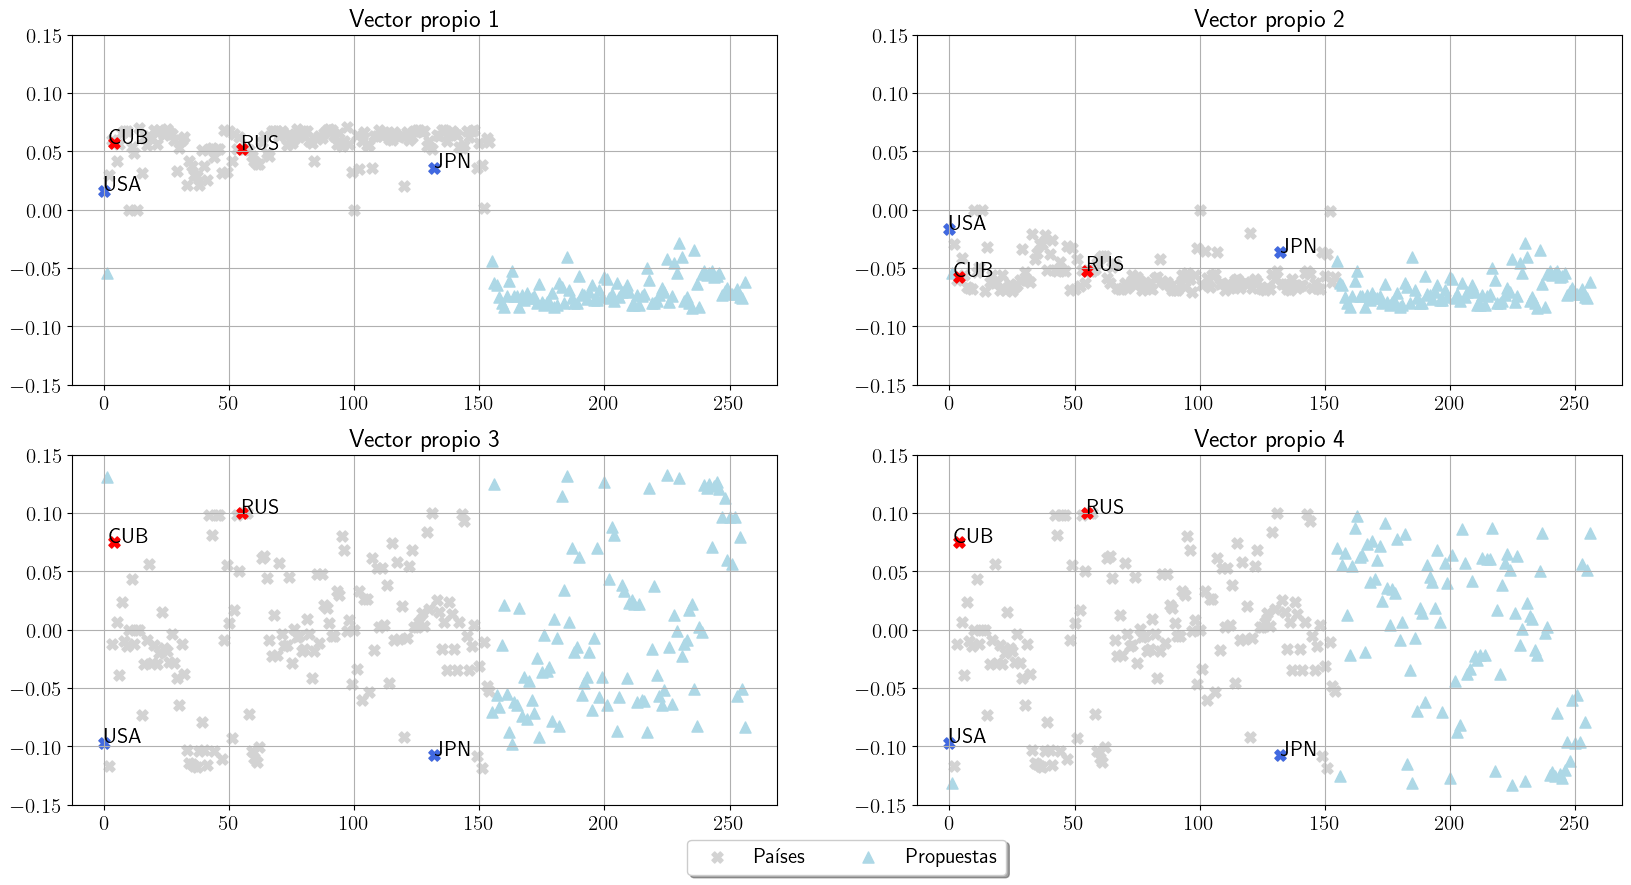

In [27]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.grid'] = True

V0 = V[:,0].real
V1 = V[:,1].real
V2 = V[:,2].real
V3 = V[:,3].real


fig, axes = plt.subplots(2, 2, figsize =(20,10))
axes[0,0].scatter(country_indexes, V0[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[0,0].scatter(res_indexes, V0[res_indexes], marker='^', label = 'Propuestas', c='lightblue')
axes[0,0].scatter(0, V0[0], c='royalblue', marker='X')
axes[0,0].annotate('USA', (0, V0[0]), size=15)
axes[0,0].scatter(132, V0[132], c='royalblue', marker='X')
axes[0,0].annotate('JPN', (132, V0[132]), size=15)
axes[0,0].scatter(4, V0[4], c='red', marker='X')
axes[0,0].annotate('CUB', (2, V0[4]), size=15)
axes[0,0].scatter(55, V0[55], c='red', marker='X')
axes[0,0].annotate('RUS', (55, V0[55]), size=15)
axes[0,0].set_title('Vector propio 1')
axes[0,0].set_ylim(-0.15, 0.15) 

axes[0,1].scatter(country_indexes, V1[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[0,1].scatter(res_indexes, V1[res_indexes], marker='^', label = 'Propuestas', c='lightblue')
axes[0,1].scatter(0, V1[0], c='royalblue', marker='X')
axes[0,1].annotate('USA', (0, V1[0]), size=15)
axes[0,1].scatter(132, V1[132], c='royalblue', marker='X')
axes[0,1].annotate('JPN', (132, V1[132]), size=15)
axes[0,1].scatter(4, V1[4], c='red', marker='X')
axes[0,1].annotate('CUB', (2, V1[4]), size=15)
axes[0,1].scatter(55, V1[55], c='red', marker='X')
axes[0,1].annotate('RUS', (55, V1[55]), size=15)
axes[0,1].set_title('Vector propio 2')
axes[0,1].set_ylim(-0.15, 0.15) 

axes[1,0].scatter(country_indexes, V2[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[1,0].scatter(res_indexes, V2[res_indexes], marker='^', label = 'Propuestas', c='lightblue')
axes[1,0].scatter(0, V2[0], c='royalblue', marker='X')
axes[1,0].annotate('USA', (0, V2[0]), size=15)
axes[1,0].scatter(132, V2[132], c='royalblue', marker='X')
axes[1,0].annotate('JPN', (132, V2[132]), size=15)
axes[1,0].scatter(4, V2[4], c='red', marker='X')
axes[1,0].annotate('CUB', (2, V2[4]), size=15)
axes[1,0].scatter(55, V2[55], c='red', marker='X')
axes[1,0].annotate('RUS', (55, V2[55]), size=15)
axes[1,0].set_title('Vector propio 3')
axes[1,0].set_ylim(-0.15, 0.15) 

axes[1,1].scatter(country_indexes, V3[country_indexes], marker='X', label = 'Países', c='lightgray')
axes[1,1].scatter(res_indexes, V3[res_indexes], marker='^', label = 'Propuestas', c='lightblue')
axes[1,1].scatter(0, V3[0], c='royalblue', marker='X')
axes[1,1].annotate('USA', (0, V3[0]), size=15)
axes[1,1].scatter(132, V3[132], c='royalblue', marker='X')
axes[1,1].annotate('JPN', (132, V3[132]), size=15)
axes[1,1].scatter(4, V3[4], c='red', marker='X')
axes[1,1].annotate('CUB', (2, V3[4]), size=15)
axes[1,1].scatter(55, V3[55], c='red', marker='X')
axes[1,1].annotate('RUS', (55, V3[55]), size=15)
axes[1,1].set_title('Vector propio 4')
axes[1,1].set_ylim(-0.15, 0.15) 
axes[1,1].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.07),fancybox=True, shadow=True, ncol=4)

plt.show()

In [28]:
V0_sorted = V[:,0].real.sort()
V1_sorted = V[:,1].real.sort()
V2_sorted = V[:,2].real.sort()
V3_sorted = V[:,3].real.sort()


country_indexes_sorted_V0 = torch.nonzero(torch.isin(V0_sorted.indices, torch.Tensor(country_indexes))).squeeze()
res_indexes_sorted_V0 = torch.nonzero(torch.isin(V0_sorted.indices, torch.Tensor(res_indexes))).squeeze()

USA_index_V0 = torch.where(V0_sorted.indices == 0)[0].item()
JPN_index_V0 = torch.where(V0_sorted.indices == 132)[0].item()
CUB_index_V0 = torch.where(V0_sorted.indices == 4)[0].item()
RUS_index_V0 = torch.where(V0_sorted.indices == 55)[0].item()


country_indexes_sorted_V1 = torch.nonzero(torch.isin(V1_sorted.indices, torch.Tensor(country_indexes))).squeeze()
res_indexes_sorted_V1 = torch.nonzero(torch.isin(V1_sorted.indices, torch.Tensor(res_indexes))).squeeze()

USA_index_V1 = torch.where(V1_sorted.indices == 0)[0].item()
JPN_index_V1 = torch.where(V1_sorted.indices == 132)[0].item()
CUB_index_V1 = torch.where(V1_sorted.indices == 4)[0].item()
RUS_index_V1 = torch.where(V1_sorted.indices == 55)[0].item()

country_indexes_sorted_V2 = torch.nonzero(torch.isin(V2_sorted.indices, torch.Tensor(country_indexes))).squeeze()
res_indexes_sorted_V2 = torch.nonzero(torch.isin(V2_sorted.indices, torch.Tensor(res_indexes))).squeeze()

USA_index_V2 = torch.where(V2_sorted.indices == 0)[0].item()
JPN_index_V2 = torch.where(V2_sorted.indices == 132)[0].item()
CUB_index_V2 = torch.where(V2_sorted.indices == 4)[0].item()
RUS_index_V2 = torch.where(V2_sorted.indices == 55)[0].item()

country_indexes_sorted_V3 = torch.nonzero(torch.isin(V3_sorted.indices, torch.Tensor(country_indexes))).squeeze()
res_indexes_sorted_V3 = torch.nonzero(torch.isin(V3_sorted.indices, torch.Tensor(res_indexes))).squeeze()

USA_index_V3 = torch.where(V3_sorted.indices == 0)[0].item()
JPN_index_V3 = torch.where(V3_sorted.indices == 132)[0].item()
CUB_index_V3 = torch.where(V3_sorted.indices == 4)[0].item()
RUS_index_V3 = torch.where(V3_sorted.indices == 55)[0].item()

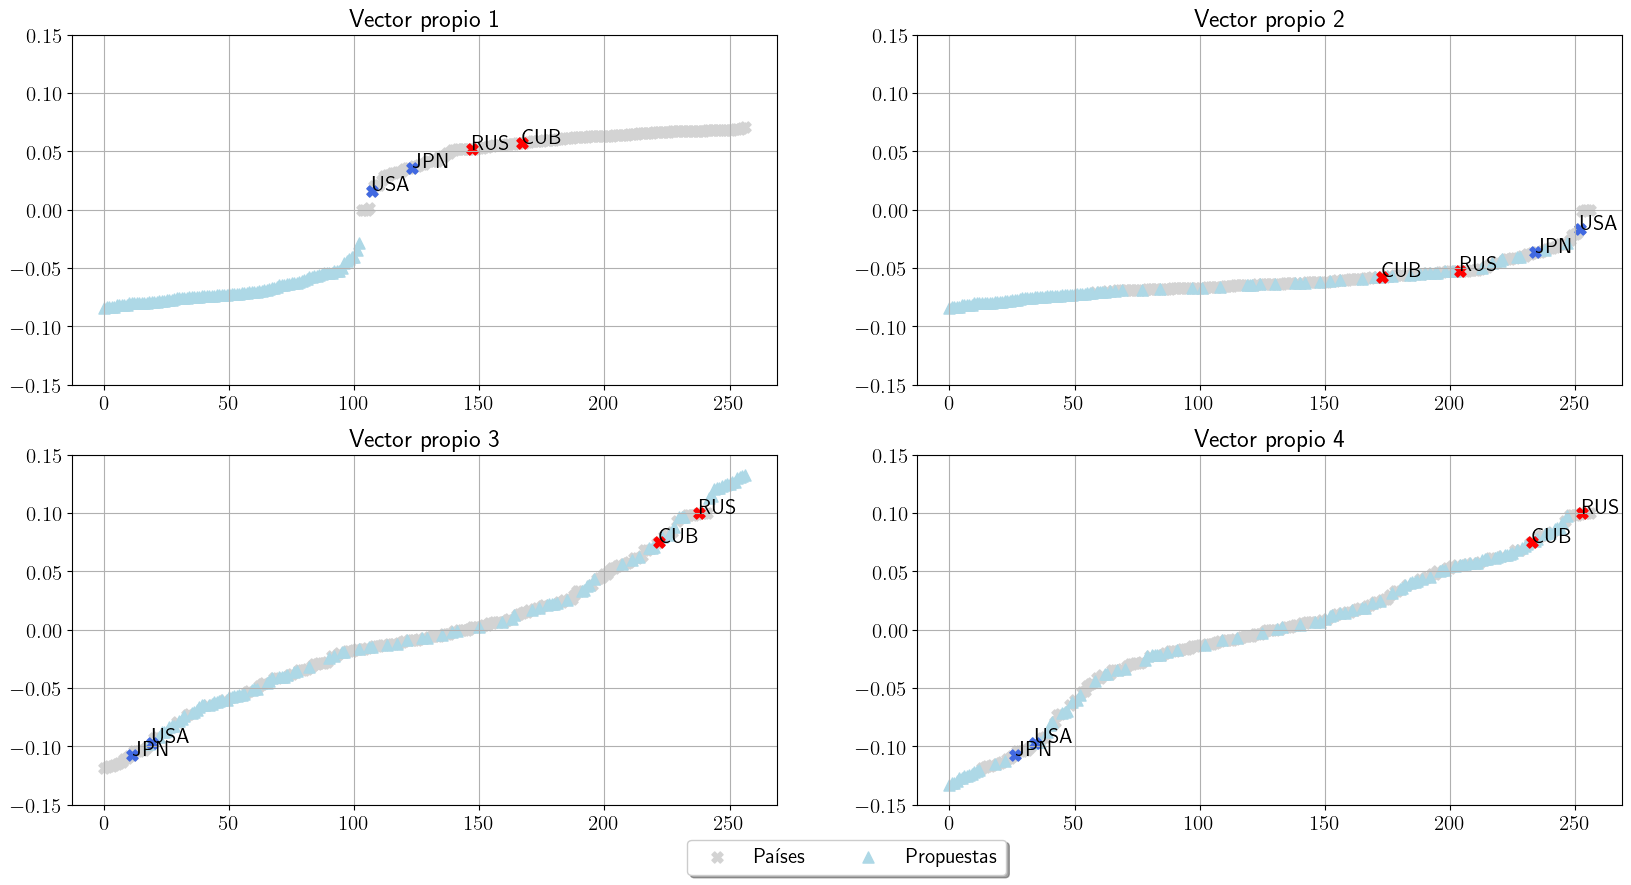

In [29]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.grid'] = True


fig, axes = plt.subplots(2, 2, figsize =(20,10))
axes[0,0].scatter(country_indexes_sorted_V0, V0_sorted.values[country_indexes_sorted_V0], marker='X', label = 'Países', c='lightgray')
axes[0,0].scatter(res_indexes_sorted_V0, V0_sorted.values[res_indexes_sorted_V0], marker='^', label = 'Propuestas', c='lightblue')
axes[0,0].scatter(USA_index_V0, V0_sorted.values[USA_index_V0], c='royalblue', marker='X')
axes[0,0].annotate('USA', (USA_index_V0, V0_sorted.values[USA_index_V0]), size=15)
axes[0,0].scatter(JPN_index_V0, V0_sorted.values[JPN_index_V0], c='royalblue', marker='X')
axes[0,0].annotate('JPN', (JPN_index_V0, V0_sorted.values[JPN_index_V0]), size=15)
axes[0,0].scatter(CUB_index_V0, V0_sorted.values[CUB_index_V0], c='red', marker='X')
axes[0,0].annotate('CUB', (CUB_index_V0, V0_sorted.values[CUB_index_V0]), size=15)
axes[0,0].scatter(RUS_index_V0, V0_sorted.values[RUS_index_V0], c='red', marker='X')
axes[0,0].annotate('RUS', (RUS_index_V0, V0_sorted.values[RUS_index_V0]), size=15)
axes[0,0].set_title('Vector propio 1')
axes[0,0].set_ylim(-0.15, 0.15) 

axes[0,1].scatter(country_indexes_sorted_V1, V1_sorted.values[country_indexes_sorted_V1], marker='X', label = 'Países', c='lightgray')
axes[0,1].scatter(res_indexes_sorted_V1, V1_sorted.values[res_indexes_sorted_V1], marker='^', label = 'Propuestas', c='lightblue')
axes[0,1].scatter(USA_index_V1, V1_sorted.values[USA_index_V1], c='royalblue', marker='X')
axes[0,1].annotate('USA', (USA_index_V1, V1_sorted.values[USA_index_V1]), size=15)
axes[0,1].scatter(JPN_index_V1, V1_sorted.values[JPN_index_V1], c='royalblue', marker='X')
axes[0,1].annotate('JPN', (JPN_index_V1, V1_sorted.values[JPN_index_V1]), size=15)
axes[0,1].scatter(CUB_index_V1, V1_sorted.values[CUB_index_V1], c='red', marker='X')
axes[0,1].annotate('CUB', (CUB_index_V1, V1_sorted.values[CUB_index_V1]), size=15)
axes[0,1].scatter(RUS_index_V1, V1_sorted.values[RUS_index_V1], c='red', marker='X')
axes[0,1].annotate('RUS', (RUS_index_V1, V1_sorted.values[RUS_index_V1]), size=15)
axes[0,1].set_title('Vector propio 2')
axes[0,1].set_ylim(-0.15, 0.15) 

axes[1,0].scatter(country_indexes_sorted_V2, V2_sorted.values[country_indexes_sorted_V2], marker='X', label = 'Países', c='lightgray')
axes[1,0].scatter(res_indexes_sorted_V2, V2_sorted.values[res_indexes_sorted_V2], marker='^', label = 'Propuestas', c='lightblue')
axes[1,0].scatter(USA_index_V2, V2_sorted.values[USA_index_V2], c='royalblue', marker='X')
axes[1,0].annotate('USA', (USA_index_V2, V2_sorted.values[USA_index_V2]), size=15)
axes[1,0].scatter(JPN_index_V2, V2_sorted.values[JPN_index_V2], c='royalblue', marker='X')
axes[1,0].annotate('JPN', (JPN_index_V2, V2_sorted.values[JPN_index_V2]), size=15)
axes[1,0].scatter(CUB_index_V2, V2_sorted.values[CUB_index_V2], c='red', marker='X')
axes[1,0].annotate('CUB', (CUB_index_V2, V2_sorted.values[CUB_index_V2]), size=15)
axes[1,0].scatter(RUS_index_V2, V2_sorted.values[RUS_index_V2], c='red', marker='X')
axes[1,0].annotate('RUS', (RUS_index_V2, V2_sorted.values[RUS_index_V2]), size=15)
axes[1,0].set_title('Vector propio 3')
axes[1,0].set_ylim(-0.15, 0.15) 

axes[1,1].scatter(country_indexes_sorted_V3, V3_sorted.values[country_indexes_sorted_V3], marker='X', label = 'Países', c='lightgray')
axes[1,1].scatter(res_indexes_sorted_V3, V3_sorted.values[res_indexes_sorted_V3], marker='^', label = 'Propuestas', c='lightblue')
axes[1,1].scatter(USA_index_V3, V3_sorted.values[USA_index_V3], c='royalblue', marker='X')
axes[1,1].annotate('USA', (USA_index_V3, V3_sorted.values[USA_index_V3]), size=15)
axes[1,1].scatter(JPN_index_V3, V3_sorted.values[JPN_index_V3], c='royalblue', marker='X')
axes[1,1].annotate('JPN', (JPN_index_V3, V3_sorted.values[JPN_index_V3]), size=15)
axes[1,1].scatter(CUB_index_V3, V3_sorted.values[CUB_index_V3], c='red', marker='X')
axes[1,1].annotate('CUB', (CUB_index_V3, V3_sorted.values[CUB_index_V3]), size=15)
axes[1,1].scatter(RUS_index_V3, V3_sorted.values[RUS_index_V3], c='red', marker='X')
axes[1,1].annotate('RUS', (RUS_index_V3, V3_sorted.values[RUS_index_V3]), size=15)
axes[1,1].set_title('Vector propio 4')
axes[1,1].set_ylim(-0.15, 0.15) 
axes[1,1].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.07),fancybox=True, shadow=True, ncol=4)

plt.show()

In [37]:
V0_sorted_countries = V[:,0].real[country_indexes].sort()
V1_sorted_countries = V[:,1].real[country_indexes].sort()
V2_sorted_countries = V[:,2].real[country_indexes].sort()
V3_sorted_countries = V[:,3].real[country_indexes].sort()

USA_index = torch.where(torch.tensor(country_indexes) == 0)[0].item()
JPN_index = torch.where(torch.tensor(country_indexes) == 132)[0].item()
CUB_index = torch.where(torch.tensor(country_indexes) == 4)[0].item()
RUS_index = torch.where(torch.tensor(country_indexes) == 55)[0].item()

USA_index_V0 = torch.where(V0_sorted_countries.indices == USA_index)[0].item()
JPN_index_V0 = torch.where(V0_sorted_countries.indices == JPN_index)[0].item()
CUB_index_V0 = torch.where(V0_sorted_countries.indices == CUB_index)[0].item()
RUS_index_V0 = torch.where(V0_sorted_countries.indices == RUS_index)[0].item()

USA_index_V1 = torch.where(V1_sorted_countries.indices == USA_index)[0].item()
JPN_index_V1 = torch.where(V1_sorted_countries.indices == JPN_index)[0].item()
CUB_index_V1 = torch.where(V1_sorted_countries.indices == CUB_index)[0].item()
RUS_index_V1 = torch.where(V1_sorted_countries.indices == RUS_index)[0].item()

USA_index_V2 = torch.where(V2_sorted_countries.indices == USA_index)[0].item()
JPN_index_V2 = torch.where(V2_sorted_countries.indices == JPN_index)[0].item()
CUB_index_V2 = torch.where(V2_sorted_countries.indices == CUB_index)[0].item()
RUS_index_V2 = torch.where(V2_sorted_countries.indices == RUS_index)[0].item()

USA_index_V3 = torch.where(V3_sorted_countries.indices == USA_index)[0].item()
JPN_index_V3 = torch.where(V3_sorted_countries.indices == JPN_index)[0].item()
CUB_index_V3 = torch.where(V3_sorted_countries.indices == CUB_index)[0].item()
RUS_index_V3 = torch.where(V3_sorted_countries.indices == RUS_index)[0].item()

In [38]:
V0_sorted_res = V[:,0].real[res_indexes].sort()
V1_sorted_res = V[:,1].real[res_indexes].sort()
V2_sorted_res = V[:,2].real[res_indexes].sort()
V3_sorted_res = V[:,3].real[res_indexes].sort()

me_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(me_indices))).squeeze()
nu_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(nu_indices))).squeeze()
di_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(di_indices))).squeeze()
co_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(co_indices))).squeeze()
hr_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(hr_indices))).squeeze()
ec_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(ec_indices))).squeeze()

me_indices_V0 = torch.nonzero(torch.isin(V0_sorted_res.indices,torch.tensor(me_res_index))).squeeze()
nu_indices_V0 = torch.nonzero(torch.isin(V0_sorted_res.indices,torch.tensor(nu_res_index))).squeeze()
di_indices_V0 = torch.nonzero(torch.isin(V0_sorted_res.indices,torch.tensor(di_res_index))).squeeze()
co_indices_V0 = torch.nonzero(torch.isin(V0_sorted_res.indices,torch.tensor(co_res_index))).squeeze()
hr_indices_V0 = torch.nonzero(torch.isin(V0_sorted_res.indices,torch.tensor(hr_res_index))).squeeze()
ec_indices_V0 = torch.nonzero(torch.isin(V0_sorted_res.indices,torch.tensor(ec_res_index))).squeeze()


me_indices_V1 = torch.nonzero(torch.isin(V1_sorted_res.indices,torch.tensor(me_res_index))).squeeze()
nu_indices_V1 = torch.nonzero(torch.isin(V1_sorted_res.indices,torch.tensor(nu_res_index))).squeeze()
di_indices_V1 = torch.nonzero(torch.isin(V1_sorted_res.indices,torch.tensor(di_res_index))).squeeze()
co_indices_V1 = torch.nonzero(torch.isin(V1_sorted_res.indices,torch.tensor(co_res_index))).squeeze()
hr_indices_V1 = torch.nonzero(torch.isin(V1_sorted_res.indices,torch.tensor(hr_res_index))).squeeze()
ec_indices_V1 = torch.nonzero(torch.isin(V1_sorted_res.indices,torch.tensor(ec_res_index))).squeeze()


me_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res.indices,torch.tensor(me_res_index))).squeeze()
nu_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res.indices,torch.tensor(nu_res_index))).squeeze()
di_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res.indices,torch.tensor(di_res_index))).squeeze()
co_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res.indices,torch.tensor(co_res_index))).squeeze()
hr_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res.indices,torch.tensor(hr_res_index))).squeeze()
ec_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res.indices,torch.tensor(ec_res_index))).squeeze()


me_indices_V3 = torch.nonzero(torch.isin(V3_sorted_res.indices,torch.tensor(me_res_index))).squeeze()
nu_indices_V3 = torch.nonzero(torch.isin(V3_sorted_res.indices,torch.tensor(nu_res_index))).squeeze()
di_indices_V3 = torch.nonzero(torch.isin(V3_sorted_res.indices,torch.tensor(di_res_index))).squeeze()
co_indices_V3 = torch.nonzero(torch.isin(V3_sorted_res.indices,torch.tensor(co_res_index))).squeeze()
hr_indices_V3 = torch.nonzero(torch.isin(V3_sorted_res.indices,torch.tensor(hr_res_index))).squeeze()
ec_indices_V3 = torch.nonzero(torch.isin(V3_sorted_res.indices,torch.tensor(ec_res_index))).squeeze()




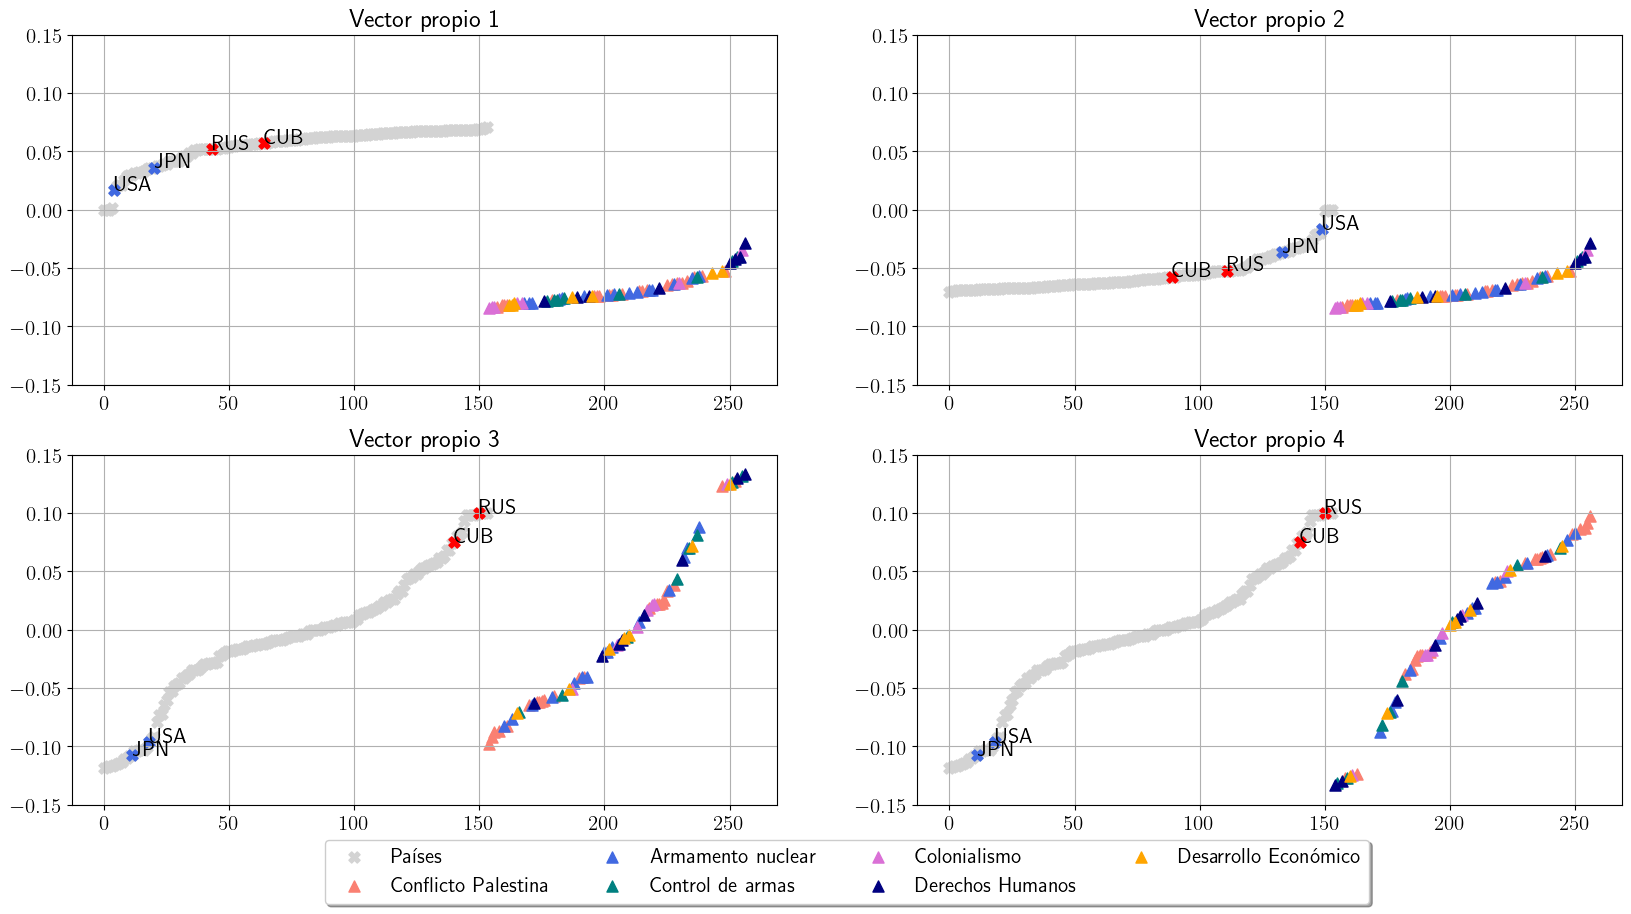

In [39]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.grid'] = True


fig, axes = plt.subplots(2, 2, figsize =(20,10))
axes[0,0].scatter(range(V0_sorted_countries.values.shape[0]), V0_sorted_countries.values, marker='X', label = 'Países', c='lightgray')
axes[0,0].scatter(V0_sorted_countries.values.shape[0]+me_indices_V0, V0_sorted_res.values[me_indices_V0], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[0,0].scatter(V0_sorted_countries.values.shape[0]+nu_indices_V0, V0_sorted_res.values[nu_indices_V0], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[0,0].scatter(V0_sorted_countries.values.shape[0]+di_indices_V0, V0_sorted_res.values[di_indices_V0], marker='^', label = 'Control de armas', c='teal')
axes[0,0].scatter(V0_sorted_countries.values.shape[0]+co_indices_V0, V0_sorted_res.values[co_indices_V0], marker='^', label = 'Colonialismo', c='orchid')
axes[0,0].scatter(V0_sorted_countries.values.shape[0]+hr_indices_V0, V0_sorted_res.values[hr_indices_V0], marker='^', label = 'Derechos Humanos', c='navy')
axes[0,0].scatter(V0_sorted_countries.values.shape[0]+ec_indices_V0, V0_sorted_res.values[ec_indices_V0], marker='^', label = 'Desarrollo Económico', c='orange')
axes[0,0].scatter(USA_index_V0, V0_sorted_countries.values[USA_index_V0], c='royalblue', marker='X')
axes[0,0].annotate('USA', (USA_index_V0, V0_sorted_countries.values[USA_index_V0]), size=15)
axes[0,0].scatter(JPN_index_V0, V0_sorted_countries.values[JPN_index_V0], c='royalblue', marker='X')
axes[0,0].annotate('JPN', (JPN_index_V0, V0_sorted_countries.values[JPN_index_V0]), size=15)
axes[0,0].scatter(CUB_index_V0, V0_sorted_countries.values[CUB_index_V0], c='red', marker='X')
axes[0,0].annotate('CUB', (CUB_index_V0, V0_sorted_countries.values[CUB_index_V0]), size=15)
axes[0,0].scatter(RUS_index_V0, V0_sorted_countries.values[RUS_index_V0], c='red', marker='X')
axes[0,0].annotate('RUS', (RUS_index_V0, V0_sorted_countries.values[RUS_index_V0]), size=15)
axes[0,0].set_title('Vector propio 1')
axes[0,0].set_ylim(-0.15, 0.15) 

axes[0,1].scatter(range(V1_sorted_countries.values.shape[0]), V1_sorted_countries.values, marker='X', label = 'Países', c='lightgray')
axes[0,1].scatter(V1_sorted_countries.values.shape[0]+me_indices_V1, V1_sorted_res.values[me_indices_V1], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[0,1].scatter(V1_sorted_countries.values.shape[0]+nu_indices_V1, V1_sorted_res.values[nu_indices_V1], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[0,1].scatter(V1_sorted_countries.values.shape[0]+di_indices_V1, V1_sorted_res.values[di_indices_V1], marker='^', label = 'Control de armas', c='teal')
axes[0,1].scatter(V1_sorted_countries.values.shape[0]+co_indices_V1, V1_sorted_res.values[co_indices_V1], marker='^', label = 'Colonialismo', c='orchid')
axes[0,1].scatter(V1_sorted_countries.values.shape[0]+hr_indices_V1, V1_sorted_res.values[hr_indices_V1], marker='^', label = 'Derechos Humanos', c='navy')
axes[0,1].scatter(V1_sorted_countries.values.shape[0]+ec_indices_V1, V1_sorted_res.values[ec_indices_V1], marker='^', label = 'Desarrollo Económico', c='orange')
axes[0,1].scatter(USA_index_V1, V1_sorted_countries.values[USA_index_V1], c='royalblue', marker='X')
axes[0,1].annotate('USA', (USA_index_V1, V1_sorted_countries.values[USA_index_V1]), size=15)
axes[0,1].scatter(JPN_index_V1, V1_sorted_countries.values[JPN_index_V1], c='royalblue', marker='X')
axes[0,1].annotate('JPN', (JPN_index_V1, V1_sorted_countries.values[JPN_index_V1]), size=15)
axes[0,1].scatter(CUB_index_V1, V1_sorted_countries.values[CUB_index_V1], c='red', marker='X')
axes[0,1].annotate('CUB', (CUB_index_V1, V1_sorted_countries.values[CUB_index_V1]), size=15)
axes[0,1].scatter(RUS_index_V1, V1_sorted_countries.values[RUS_index_V1], c='red', marker='X')
axes[0,1].annotate('RUS', (RUS_index_V1, V1_sorted_countries.values[RUS_index_V1]), size=15)
axes[0,1].set_title('Vector propio 2')
axes[0,1].set_ylim(-0.15, 0.15) 

axes[1,0].scatter(range(V2_sorted_countries.values.shape[0]), V2_sorted_countries.values, marker='X', label = 'Países', c='lightgray')
axes[1,0].scatter(V2_sorted_countries.values.shape[0]+me_indices_V2, V2_sorted_res.values[me_indices_V2], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[1,0].scatter(V2_sorted_countries.values.shape[0]+nu_indices_V2, V2_sorted_res.values[nu_indices_V2], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[1,0].scatter(V2_sorted_countries.values.shape[0]+di_indices_V2, V2_sorted_res.values[di_indices_V2], marker='^', label = 'Control de armas', c='teal')
axes[1,0].scatter(V2_sorted_countries.values.shape[0]+co_indices_V2, V2_sorted_res.values[co_indices_V2], marker='^', label = 'Colonialismo', c='orchid')
axes[1,0].scatter(V2_sorted_countries.values.shape[0]+hr_indices_V2, V2_sorted_res.values[hr_indices_V2], marker='^', label = 'Derechos Humanos', c='navy')
axes[1,0].scatter(V2_sorted_countries.values.shape[0]+ec_indices_V2, V2_sorted_res.values[ec_indices_V2], marker='^', label = 'Desarrollo Económico', c='orange')
axes[1,0].scatter(USA_index_V2, V2_sorted_countries.values[USA_index_V2], c='royalblue', marker='X')
axes[1,0].annotate('USA', (USA_index_V2, V2_sorted_countries.values[USA_index_V2]), size=15)
axes[1,0].scatter(JPN_index_V2, V2_sorted_countries.values[JPN_index_V2], c='royalblue', marker='X')
axes[1,0].annotate('JPN', (JPN_index_V2, V2_sorted_countries.values[JPN_index_V2]), size=15)
axes[1,0].scatter(CUB_index_V2, V2_sorted_countries.values[CUB_index_V2], c='red', marker='X')
axes[1,0].annotate('CUB', (CUB_index_V2, V2_sorted_countries.values[CUB_index_V2]), size=15)
axes[1,0].scatter(RUS_index_V2, V2_sorted_countries.values[RUS_index_V2], c='red', marker='X')
axes[1,0].annotate('RUS', (RUS_index_V2, V2_sorted_countries.values[RUS_index_V2]), size=15)
axes[1,0].set_title('Vector propio 3')
axes[1,0].set_ylim(-0.15, 0.15) 

axes[1,1].scatter(range(V3_sorted_countries.values.shape[0]), V3_sorted_countries.values, marker='X', label = 'Países', c='lightgray')
axes[1,1].scatter(V3_sorted_countries.values.shape[0]+me_indices_V3, V3_sorted_res.values[me_indices_V3], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[1,1].scatter(V3_sorted_countries.values.shape[0]+nu_indices_V3, V3_sorted_res.values[nu_indices_V3], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[1,1].scatter(V3_sorted_countries.values.shape[0]+di_indices_V3, V3_sorted_res.values[di_indices_V3], marker='^', label = 'Control de armas', c='teal')
axes[1,1].scatter(V3_sorted_countries.values.shape[0]+co_indices_V3, V3_sorted_res.values[co_indices_V3], marker='^', label = 'Colonialismo', c='orchid')
axes[1,1].scatter(V3_sorted_countries.values.shape[0]+hr_indices_V3, V3_sorted_res.values[hr_indices_V3], marker='^', label = 'Derechos Humanos', c='navy')
axes[1,1].scatter(V3_sorted_countries.values.shape[0]+ec_indices_V3, V3_sorted_res.values[ec_indices_V3], marker='^', label = 'Desarrollo Económico', c='orange')
axes[1,1].scatter(USA_index_V3, V3_sorted_countries.values[USA_index_V3], c='royalblue', marker='X')
axes[1,1].annotate('USA', (USA_index_V3, V3_sorted_countries.values[USA_index_V3]), size=15)
axes[1,1].scatter(JPN_index_V3, V3_sorted_countries.values[JPN_index_V3], c='royalblue', marker='X')
axes[1,1].annotate('JPN', (JPN_index_V3, V3_sorted_countries.values[JPN_index_V3]), size=15)
axes[1,1].scatter(CUB_index_V3, V3_sorted_countries.values[CUB_index_V3], c='red', marker='X')
axes[1,1].annotate('CUB', (CUB_index_V3, V3_sorted_countries.values[CUB_index_V3]), size=15)
axes[1,1].scatter(RUS_index_V3, V3_sorted_countries.values[RUS_index_V3], c='red', marker='X')
axes[1,1].annotate('RUS', (RUS_index_V3, V3_sorted_countries.values[RUS_index_V3]), size=15)
axes[1,1].set_title('Vector propio 4')
axes[1,1].set_ylim(-0.15, 0.15) 
axes[1,1].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.07),fancybox=True, shadow=True, ncol=4)

plt.show()

In [32]:
V0 = V[:,0].real
V1 = V[:,1].real
V2 = V[:,2].real
V3 = V[:,3].real

n_countries = len(country_indexes)
n_res = len(res_indexes)

V2_sorted_country_indices=V2[country_indexes].sort().indices
V2_sorted_res_indices=V2[res_indexes].sort().indices

## Paises

USA_index = torch.where(torch.tensor(country_indexes) == 0)[0].item()
JPN_index = torch.where(torch.tensor(country_indexes) == 132)[0].item()
CUB_index = torch.where(torch.tensor(country_indexes) == 4)[0].item()
RUS_index = torch.where(torch.tensor(country_indexes) == 55)[0].item()

USA_index_V2 = torch.where(V2_sorted_countries.indices == USA_index)[0].item()
JPN_index_V2 = torch.where(V2_sorted_countries.indices == JPN_index)[0].item()
CUB_index_V2 = torch.where(V2_sorted_countries.indices == CUB_index)[0].item()
RUS_index_V2 = torch.where(V2_sorted_countries.indices == RUS_index)[0].item()


## Propuestas
me_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(me_indices))).squeeze()
nu_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(nu_indices))).squeeze()
di_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(di_indices))).squeeze()
co_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(co_indices))).squeeze()
hr_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(hr_indices))).squeeze()
ec_res_index = torch.nonzero(torch.isin(torch.tensor(res_indexes), torch.tensor(ec_indices))).squeeze()

me_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res_indices,torch.tensor(me_res_index))).squeeze()
nu_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res_indices,torch.tensor(nu_res_index))).squeeze()
di_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res_indices,torch.tensor(di_res_index))).squeeze()
co_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res_indices,torch.tensor(co_res_index))).squeeze()
hr_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res_indices,torch.tensor(hr_res_index))).squeeze()
ec_indices_V2 = torch.nonzero(torch.isin(V2_sorted_res_indices,torch.tensor(ec_res_index))).squeeze()

In [33]:
V2[res_indexes][V2_sorted_res_indices]

tensor([-0.0976, -0.0916, -0.0876, -0.0876, -0.0864, -0.0833, -0.0828, -0.0824,
        -0.0781, -0.0765, -0.0738, -0.0714, -0.0701, -0.0684, -0.0660, -0.0647,
        -0.0645, -0.0641, -0.0632, -0.0621, -0.0619, -0.0610, -0.0605, -0.0600,
        -0.0576, -0.0576, -0.0570, -0.0563, -0.0559, -0.0556, -0.0549, -0.0513,
        -0.0511, -0.0505, -0.0456, -0.0438, -0.0417, -0.0407, -0.0406, -0.0404,
        -0.0385, -0.0360, -0.0350, -0.0315, -0.0243, -0.0226, -0.0189, -0.0188,
        -0.0168, -0.0146, -0.0145, -0.0128, -0.0119, -0.0090, -0.0069, -0.0066,
        -0.0043, -0.0021, -0.0008,  0.0028,  0.0068,  0.0091,  0.0126,  0.0172,
         0.0188,  0.0216,  0.0217,  0.0220,  0.0220,  0.0229,  0.0258,  0.0336,
         0.0344,  0.0378,  0.0383,  0.0436,  0.0560,  0.0600,  0.0621,  0.0698,
         0.0701,  0.0714,  0.0794,  0.0816,  0.0878,  0.0963,  0.0964,  0.0969,
         0.1126,  0.1148,  0.1206,  0.1214,  0.1215,  0.1234,  0.1242,  0.1249,
         0.1253,  0.1268,  0.1271,  0.12

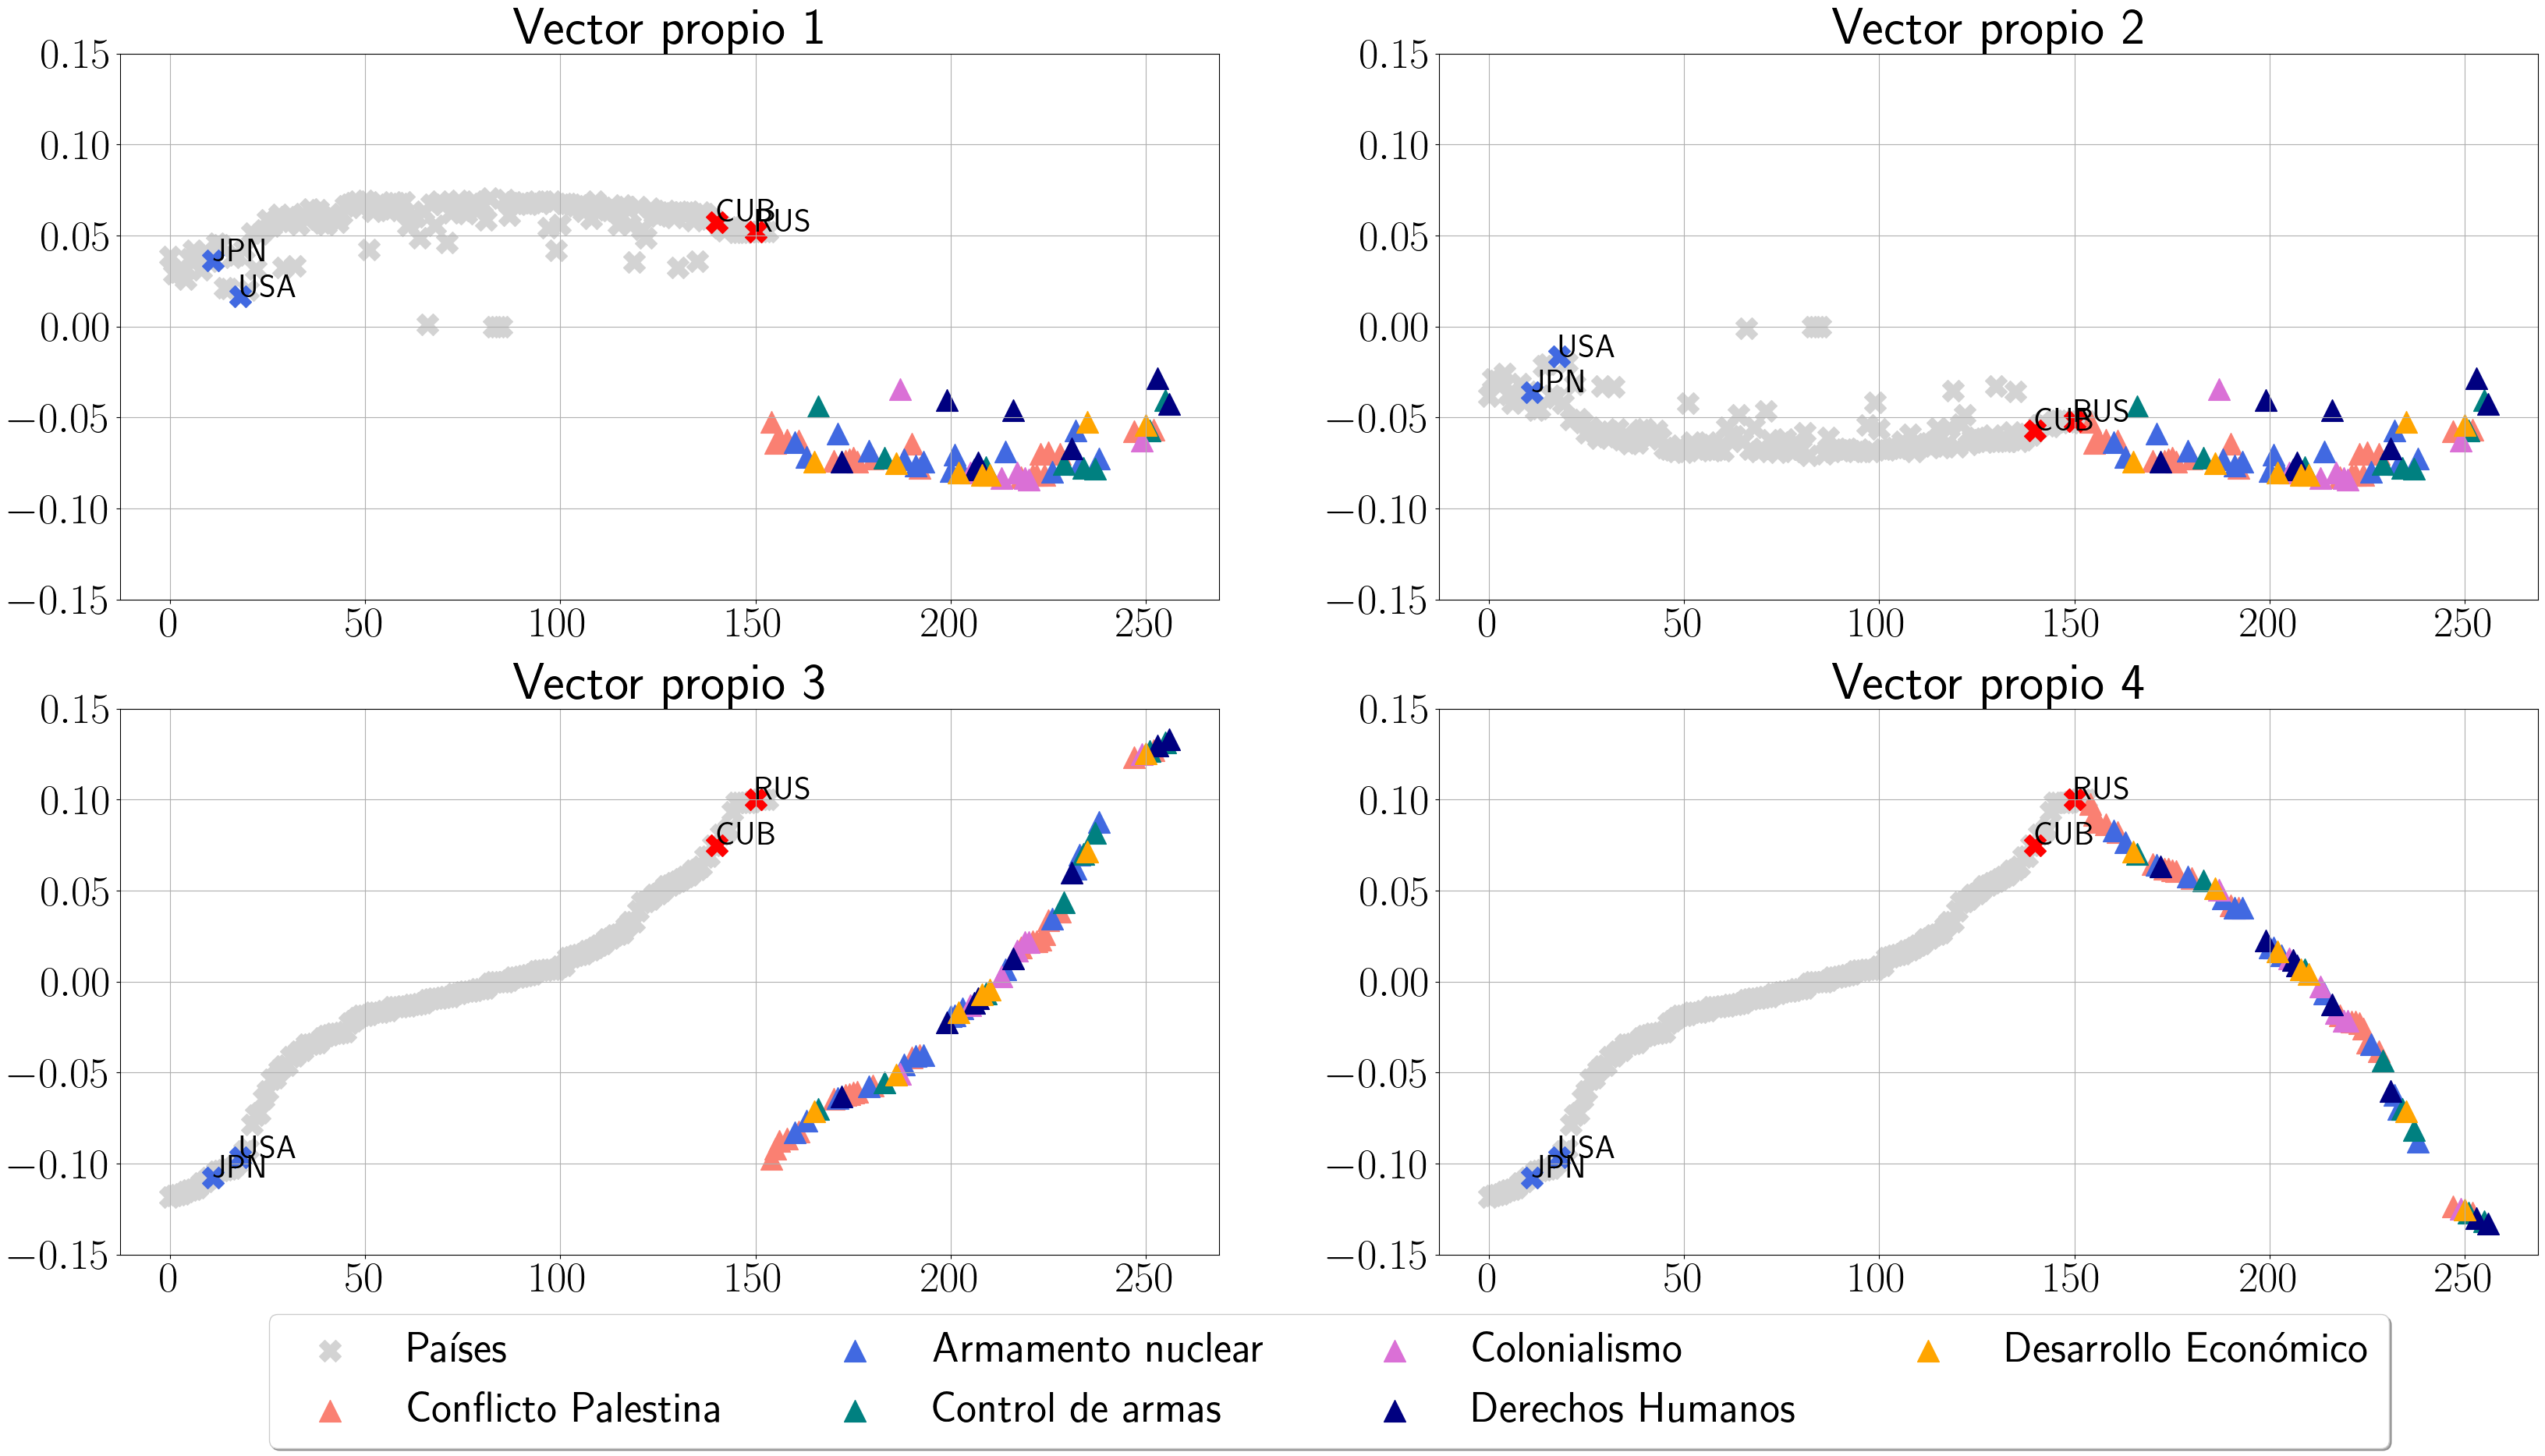

In [34]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 40
plt.rcParams['lines.markersize'] = 20
plt.rcParams['axes.grid'] = True


fig, axes = plt.subplots(2, 2, figsize =(40,20))
axes[0,0].scatter(range(n_countries), V0[country_indexes][V2_sorted_country_indices], marker='X', label = 'Países', c='lightgray')
axes[0,0].scatter(n_countries+me_indices_V2, V0[res_indexes][V2_sorted_res_indices][me_indices_V2], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[0,0].scatter(n_countries+nu_indices_V2, V0[res_indexes][V2_sorted_res_indices][nu_indices_V2], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[0,0].scatter(n_countries+di_indices_V2, V0[res_indexes][V2_sorted_res_indices][di_indices_V2], marker='^', label = 'Control de armas', c='teal')
axes[0,0].scatter(n_countries+co_indices_V2, V0[res_indexes][V2_sorted_res_indices][co_indices_V2], marker='^', label = 'Colonialismo', c='orchid')
axes[0,0].scatter(n_countries+hr_indices_V2, V0[res_indexes][V2_sorted_res_indices][hr_indices_V2], marker='^', label = 'Derechos Humanos', c='navy')
axes[0,0].scatter(n_countries+ec_indices_V2, V0[res_indexes][V2_sorted_res_indices][ec_indices_V2], marker='^', label = 'Desarrollo Económico', c='orange')
axes[0,0].scatter(USA_index_V2, V0[country_indexes][V2_sorted_country_indices][USA_index_V2], c='royalblue', marker='X')
axes[0,0].annotate('USA', (USA_index_V2, V0[country_indexes][V2_sorted_country_indices][USA_index_V2]), size=30)
axes[0,0].scatter(JPN_index_V2, V0[country_indexes][V2_sorted_country_indices][JPN_index_V2], c='royalblue', marker='X')
axes[0,0].annotate('JPN', (JPN_index_V2, V0[country_indexes][V2_sorted_country_indices][JPN_index_V2]), size=30)
axes[0,0].scatter(CUB_index_V2, V0[country_indexes][V2_sorted_country_indices][CUB_index_V2], c='red', marker='X')
axes[0,0].annotate('CUB', (CUB_index_V2, V0[country_indexes][V2_sorted_country_indices][CUB_index_V2]), size=30)
axes[0,0].scatter(RUS_index_V2, V0[country_indexes][V2_sorted_country_indices][RUS_index_V2], c='red', marker='X')
axes[0,0].annotate('RUS', (RUS_index_V2, V0[country_indexes][V2_sorted_country_indices][RUS_index_V2]), size=30)
axes[0,0].set_title('Vector propio 1')
axes[0,0].set_ylim(-0.15, 0.15) 

axes[0,1].scatter(range(n_countries), V1[country_indexes][V2_sorted_country_indices], marker='X', label = 'Países', c='lightgray')
axes[0,1].scatter(n_countries+me_indices_V2, V1[res_indexes][V2_sorted_res_indices][me_indices_V2], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[0,1].scatter(n_countries+nu_indices_V2, V1[res_indexes][V2_sorted_res_indices][nu_indices_V2], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[0,1].scatter(n_countries+di_indices_V2, V1[res_indexes][V2_sorted_res_indices][di_indices_V2], marker='^', label = 'Control de armas', c='teal')
axes[0,1].scatter(n_countries+co_indices_V2, V1[res_indexes][V2_sorted_res_indices][co_indices_V2], marker='^', label = 'Colonialismo', c='orchid')
axes[0,1].scatter(n_countries+hr_indices_V2, V1[res_indexes][V2_sorted_res_indices][hr_indices_V2], marker='^', label = 'Derechos Humanos', c='navy')
axes[0,1].scatter(n_countries+ec_indices_V2, V1[res_indexes][V2_sorted_res_indices][ec_indices_V2], marker='^', label = 'Desarrollo Económico', c='orange')
axes[0,1].scatter(USA_index_V2, V1[country_indexes][V2_sorted_country_indices][USA_index_V2], c='royalblue', marker='X')
axes[0,1].annotate('USA', (USA_index_V2, V1[country_indexes][V2_sorted_country_indices][USA_index_V2]), size=30)
axes[0,1].scatter(JPN_index_V2, V1[country_indexes][V2_sorted_country_indices][JPN_index_V2], c='royalblue', marker='X')
axes[0,1].annotate('JPN', (JPN_index_V2, V1[country_indexes][V2_sorted_country_indices][JPN_index_V2]), size=30)
axes[0,1].scatter(CUB_index_V2, V1[country_indexes][V2_sorted_country_indices][CUB_index_V2], c='red', marker='X')
axes[0,1].annotate('CUB', (CUB_index_V2, V1[country_indexes][V2_sorted_country_indices][CUB_index_V2]), size=30)
axes[0,1].scatter(RUS_index_V2, V1[country_indexes][V2_sorted_country_indices][RUS_index_V2], c='red', marker='X')
axes[0,1].annotate('RUS', (RUS_index_V2, V1[country_indexes][V2_sorted_country_indices][RUS_index_V2]), size=30)
axes[0,1].set_title('Vector propio 2')
axes[0,1].set_ylim(-0.15, 0.15) 

axes[1,0].scatter(range(n_countries), V2[country_indexes][V2_sorted_country_indices], marker='X', label = 'Países', c='lightgray')
# axes[1,0].scatter(range(n_countries,n_countries+n_res), V2[res_indexes][V2_sorted_res_indices], marker='^', label = 'Propuestas', c='lightblue')
axes[1,0].scatter(n_countries+me_indices_V2, V2[res_indexes][V2_sorted_res_indices][me_indices_V2], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[1,0].scatter(n_countries+nu_indices_V2, V2[res_indexes][V2_sorted_res_indices][nu_indices_V2], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[1,0].scatter(n_countries+di_indices_V2, V2[res_indexes][V2_sorted_res_indices][di_indices_V2], marker='^', label = 'Control de armas', c='teal')
axes[1,0].scatter(n_countries+co_indices_V2, V2[res_indexes][V2_sorted_res_indices][co_indices_V2], marker='^', label = 'Colonialismo', c='orchid')
axes[1,0].scatter(n_countries+hr_indices_V2, V2[res_indexes][V2_sorted_res_indices][hr_indices_V2], marker='^', label = 'Derechos Humanos', c='navy')
axes[1,0].scatter(n_countries+ec_indices_V2, V2[res_indexes][V2_sorted_res_indices][ec_indices_V2], marker='^', label = 'Desarrollo Económico', c='orange')
axes[1,0].scatter(USA_index_V2, V2[country_indexes][V2_sorted_country_indices][USA_index_V2], c='royalblue', marker='X')
axes[1,0].annotate('USA', (USA_index_V2, V2[country_indexes][V2_sorted_country_indices][USA_index_V2]), size=30)
axes[1,0].scatter(JPN_index_V2, V2[country_indexes][V2_sorted_country_indices][JPN_index_V2], c='royalblue', marker='X')
axes[1,0].annotate('JPN', (JPN_index_V2, V2[country_indexes][V2_sorted_country_indices][JPN_index_V2]), size=30)
axes[1,0].scatter(CUB_index_V2, V2[country_indexes][V2_sorted_country_indices][CUB_index_V2], c='red', marker='X')
axes[1,0].annotate('CUB', (CUB_index_V2, V2[country_indexes][V2_sorted_country_indices][CUB_index_V2]), size=30)
axes[1,0].scatter(RUS_index_V2, V2[country_indexes][V2_sorted_country_indices][RUS_index_V2], c='red', marker='X')
axes[1,0].annotate('RUS', (RUS_index_V2, V2[country_indexes][V2_sorted_country_indices][RUS_index_V2]), size=30)
axes[1,0].set_title('Vector propio 3')
axes[1,0].set_ylim(-0.15, 0.15) 

axes[1,1].scatter(range(n_countries), V3[country_indexes][V2_sorted_country_indices], marker='X', label = 'Países', c='lightgray')
axes[1,1].scatter(n_countries+me_indices_V2, V3[res_indexes][V2_sorted_res_indices][me_indices_V2], marker='^', label = 'Conflicto Palestina', c='salmon')
axes[1,1].scatter(n_countries+nu_indices_V2, V3[res_indexes][V2_sorted_res_indices][nu_indices_V2], marker='^', label = 'Armamento nuclear', c='royalblue')
axes[1,1].scatter(n_countries+di_indices_V2, V3[res_indexes][V2_sorted_res_indices][di_indices_V2], marker='^', label = 'Control de armas', c='teal')
axes[1,1].scatter(n_countries+co_indices_V2, V3[res_indexes][V2_sorted_res_indices][co_indices_V2], marker='^', label = 'Colonialismo', c='orchid')
axes[1,1].scatter(n_countries+hr_indices_V2, V3[res_indexes][V2_sorted_res_indices][hr_indices_V2], marker='^', label = 'Derechos Humanos', c='navy')
axes[1,1].scatter(n_countries+ec_indices_V2, V3[res_indexes][V2_sorted_res_indices][ec_indices_V2], marker='^', label = 'Desarrollo Económico', c='orange')
axes[1,1].scatter(USA_index_V2, V3[country_indexes][V2_sorted_country_indices][USA_index_V2], c='royalblue', marker='X')
axes[1,1].annotate('USA', (USA_index_V2, V3[country_indexes][V2_sorted_country_indices][USA_index_V2]), size=30)
axes[1,1].scatter(JPN_index_V2, V3[country_indexes][V2_sorted_country_indices][JPN_index_V2], c='royalblue', marker='X')
axes[1,1].annotate('JPN', (JPN_index_V2, V3[country_indexes][V2_sorted_country_indices][JPN_index_V2]), size=30)
axes[1,1].scatter(CUB_index_V2, V3[country_indexes][V2_sorted_country_indices][CUB_index_V2], c='red', marker='X')
axes[1,1].annotate('CUB', (CUB_index_V2, V3[country_indexes][V2_sorted_country_indices][CUB_index_V2]), size=30)
axes[1,1].scatter(RUS_index_V2, V3[country_indexes][V2_sorted_country_indices][RUS_index_V2], c='red', marker='X')
axes[1,1].annotate('RUS', (RUS_index_V2, V3[country_indexes][V2_sorted_country_indices][RUS_index_V2]), size=30)
axes[1,1].set_title('Vector propio 4')
axes[1,1].set_ylim(-0.15, 0.15) 
axes[1,1].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.07),fancybox=True, shadow=True, ncol=4)

plt.show()

In [36]:
proy_x = (V[:,:4].real.T*torch.ones(adj_matrix.shape[0])) / torch.ones(adj_matrix.shape[0]).norm()

## Paises
print("Proyeccion paises")
print(f'{proy_x[0,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,country_indexes].sum().abs().item():.3f}')

print("")
## Resoluciones
print("Proyeccion resoluciones")
print(f'{proy_x[0,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,res_indexes].sum().abs().item():.3f}')

Proyeccion paises
0.527
0.527
0.057
0.057

Proyeccion resoluciones
0.441
0.441
0.018
0.018


## 1993

In [40]:
onu_graph = create_un_graphs(votes_df[votes_df.year==1993])

G = onu_graph.to_undirected()
    
# rename nodes
mapping = {node: i for i, node in enumerate(G.nodes())}
G_ = nx.relabel_nodes(G, mapping)

country_indexes = []
res_indexes = []
__features = []

for node, data in G_.nodes(data=True):
    if data["type"] == "country":
        country_indexes.append(node)
        __features.append(data['country_features'])
    else:
        res_indexes.append(node)
        __features.append(data['res_features'])
        
adj_matrix = nx.to_numpy_array(G_)

A =  torch.Tensor(adj_matrix)
u, V = torch.linalg.eig(A)
u.real[:4]

tensor([-81.1280,  81.1280,  23.7085, -23.7085])

In [41]:
proy_x = (V[:,:4].real.T*torch.ones(adj_matrix.shape[0])) / torch.ones(adj_matrix.shape[0]).norm()

## Paises
print("Proyeccion paises")
print(f'{proy_x[0,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,country_indexes].sum().abs().item():.3f}')

print("")
## Resoluciones
print("Proyeccion resoluciones")
print(f'{proy_x[0,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,res_indexes].sum().abs().item():.3f}')


Proyeccion paises
0.575
0.575
0.104
0.104

Proyeccion resoluciones
0.354
0.354
0.015
0.015


## 2004

In [42]:
onu_graph = create_un_graphs(votes_df[votes_df.year==2004])

G = onu_graph.to_undirected()
    
# rename nodes
mapping = {node: i for i, node in enumerate(G.nodes())}
G_ = nx.relabel_nodes(G, mapping)

country_indexes = []
res_indexes = []
__features = []

for node, data in G_.nodes(data=True):
    if data["type"] == "country":
        country_indexes.append(node)
        __features.append(data['country_features'])
        if data['country code'] in ['USA', 'ISR', 'JPN', 'CUB', 'RUS']:
            print(node, data)
    else:
        res_indexes.append(node)
        __features.append(data['res_features'])
        
adj_matrix = nx.to_numpy_array(G_)

A =  torch.Tensor(adj_matrix)
u, V = torch.linalg.eig(A)
u.real[:4]

0 {'country code': 'USA', 'continent': 'North America', 'country_features': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'yellow', 'type': 'country'}
4 {'country code': 'CUB', 'continent': 'North America', 'country_features': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'yellow', 'type': 'country'}
68 {'country code': 'RUS', 'continent': 'Europe', 'country_features': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'royalblue', 'type': 'country'}
141 {'country code': 'ISR', 'continent': 'Asia', 'country_features': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'darkorange', 'type': 'country'}
159 {'country code': 'JPN', 'continent': 'Asia', 'country_features': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'color': 'darkorange', 'type': 'country'}


tensor([ 100.2913, -100.2913,   29.9401,  -29.9401])

In [43]:
proy_x = (V[:,:4].real.T*torch.ones(adj_matrix.shape[0])) / torch.ones(adj_matrix.shape[0]).norm()

## Paises
print("Proyeccion paises")
print(f'{proy_x[0,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,country_indexes].sum().abs().item():.3f}')

print("")
## Resoluciones
print("Proyeccion resoluciones")
print(f'{proy_x[0,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,res_indexes].sum().abs().item():.3f}')


Proyeccion paises
0.568
0.568
0.047
0.047

Proyeccion resoluciones
0.386
0.386
0.010
0.010


## 2017

In [44]:
onu_graph = create_un_graphs(votes_df[votes_df.year==2017])

G = onu_graph.to_undirected()
    
# rename nodes
mapping = {node: i for i, node in enumerate(G.nodes())}
G_ = nx.relabel_nodes(G, mapping)

country_indexes = []
res_indexes = []
__features = []

for node, data in G_.nodes(data=True):
    if data["type"] == "country":
        country_indexes.append(node)
        __features.append(data['country_features'])
    else:
        res_indexes.append(node)
        __features.append(data['res_features'])
        
adj_matrix = nx.to_numpy_array(G_)

A =  torch.Tensor(adj_matrix)
u, V = torch.linalg.eig(A)
u.real[:4]

tensor([ 121.0172, -121.0172,  -35.1471,   35.1471])

In [45]:
proy_x = (V[:,:4].real.T*torch.ones(adj_matrix.shape[0])) / torch.ones(adj_matrix.shape[0]).norm()

## Paises
print("Proyeccion paises")
print(f'{proy_x[0,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,country_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,country_indexes].sum().abs().item():.3f}')

print("")
## Resoluciones
print("Proyeccion resoluciones")
print(f'{proy_x[0,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[1,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[2,res_indexes].sum().abs().item():.3f}')
print(f'{proy_x[3,res_indexes].sum().abs().item():.3f}')


Proyeccion paises
0.531
0.531
0.063
0.063

Proyeccion resoluciones
0.435
0.435
0.022
0.022
